# ProPythia Quick start

In [1]:
import sys
import pandas as pd

sys.path.append('../src/')

1. GETTING SEQUENCES

This module comprehends functions to read, to check and to cut protein sequences. 
First is necessary to create the object ReadSequence. 

In [26]:
from propythia.sequence import ReadSequence
sequence=ReadSequence() #create the object to read sequence    

1.1. It is possible to create sequence object using uniprotID or the sequence itself. 
Besides, is possible, using a txt file with uniprot ID, get their sequences automatically. 

In [27]:
print('read sequence from uniprot id')
ps=sequence.get_protein_sequence_from_id('P48039') #from uniprot id
print(ps)

print('read sequence from sequence')
ps_string=sequence.read_protein_sequence("MQGNGSALPNASQPVLRGDGARPSWLASALACVLIFTIVVDILGNLLVILSVYRNKKLRN")# from string

print('read sequence from txt')
sequence.get_protein_sequence_from_txt(path = '../tests/datasets/', openfile='target.txt', savefile='result.txt')

read sequence from uniprot id
MQGNGSALPNASQPVLRGDGARPSWLASALACVLIFTIVVDILGNLLVILSVYRNKKLRNAGNIFVVSLAVADLVVAIYPYPLVLMSIFNNGWNLGYLHCQVSGFLMGLSVIGSIFNITGIAINRYCYICHSLKYDKLYSSKNSLCYVLLIWLLTLAAVLPNLRAGTLQYDPRIYSCTFAQSVSSAYTIAVVVFHFLVPMIIVIFCYLRIWILVLQVRQRVKPDRKPKLKPQDFRNFVTMFVVFVLFAICWAPLNFIGLAVASDPASMVPRIPEWLFVASYYMAYFNSCLNAIIYGLLNQNFRKEYRRIIVSLCTARVFFVDSSNDVADRVKWKPSPLMTNNNVVKVDSV
read sequence from sequence
read sequence from txt
--------------------------------------------------------
The 1 protein sequence has been downloaded!
MADSCRNLTYVRGSVGPATSTLMFVAGVVGNGLALGILSARRPARPSAFAVLVTGLAATDLLGTSFLSPAVFVAYARNSSLLGLARGGPALCDAFAFAMTFFGLASMLILFAMAVERCLALSHPYLYAQLDGPRCARLALPAIYAFCVLFCALPLLGLGQHQQYCPGSWCFLRMRWAQPGGAAFSLAYAGLVALLVAAIFLCNGSVTLSLCRMYRQQKRHQGSLGPRPRTGEDEVDHLILLALMTVVMAVCSLPLTIRCFTQAVAPDSSSEMGDLLAFRFYAFNPILDPWVFILFRKAVFQRLKLWVCCLCLGPAHGDSQTPLSQLASGRRDPRAPSAPVGKEGSCVPLSAWGEGQVEPLPPTQQSSGSAVGTSSKAEASVACSLC
--------------------------------------------------------
-----------------------

'end'

1.2 Check protein will warn you if some sequence contain invalid characters. If the protein is not valid, it returns an error message.  

In [28]:
print('check protein')
protein_inv="ADGCGVCSFADEDASX" #invalid aminoacid with an X
sequence.checkprotein(protein_inv)
protein='MQGNGSALPNASQPVLRGDGARPSWLASALACVLIFTIVVDILGNL' # valid sequence aa 
sequence.checkprotein(protein)

check protein
Error......
Please input a correct protein.
sequence valid


In [31]:
print('obtain sequences with equal size')
lista = ['AAAANNDAKMAPSSAA', 'AAAANNDAKMAPSSAAAAAAAAAAAAA', 'AAAAKMAAA', 'AAAANNDAKMAPSSAAAAAAAAAAAAAAAAANNDAKMAPSSAAAAAAAAAAAAA', 'Z']
print(sequence.get_sized_seq(lista, 10, 0, dummie = 'X'))
listb = ['AAAANNDAKMAPSSAA', 'AAAANNDAKMAPSSAAAAAAAAAAAAA', 'AAAAKMAAA']
print(sequence.get_sized_seq(listb, 0, 10, dummie = 'Y'))
print((sequence.get_sized_seq('AAVFNDRAT', 5, 5, 2)))

obtain sequences with equal size
['AAAANNDAKM', 'AAAANNDAKM', 'AAAAKMAAAX', 'AAAANNDAKM', 'ZXXXXXXXXX']
['DAKMAPSSAA', 'AAAAAAAAAA', 'YAAAAKMAAA']
['AXXXXXXXXA', 'AXXXXXXXXA', 'VXXXXXXXXV', 'FXXXXXXXXF', 'NXXXXXXXXN', 'DXXXXXXXXD', 'RXXXXXXXXR', 'AXXXXXXXXA', 'TXXXXXXXXT']


In [32]:
protein="ADGCGVGEGTGQGPMCNCMCMKWVYADEDAADLESDSFADEDASLESDSFPWSNQRVFCSFADEDAS"

# sliding window
list_subseq,indices=sequence.get_sub_seq_sliding_window (protein, window_size=20, gap=10, index=True)
print(list_subseq,indices)

# 5 aa left and 5 aa right of every S aa
subseq_to_aa=sequence.get_sub_seq_to_aa(protein, ToAA='S', window=5)
print(subseq_to_aa)

# split sequence in 5 subsequences
subseq_split=sequence.get_sub_seq_split(protein, number_of_subseq=5)
print(subseq_split)

# split sequence in the terminals and middle
subseq_terminals=sequence.get_sub_seq_terminals(protein, N_terminal=5, C_terminal=5, rest=True)
print(subseq_terminals)

['ADGCGVGEGTGQGPMCNCMC', 'GQGPMCNCMCMKWVYADEDA', 'MKWVYADEDAADLESDSFAD', 'ADLESDSFADEDASLESDSF', 'EDASLESDSFPWSNQRVFCS'] [(0, 20), (10, 30), (20, 40), (30, 50), (40, 60)]
['AADLESDSFAD', 'DLESDSFADED', 'ADEDASLESDS', 'DASLESDSFPW', 'SLESDSFPWSN', 'DSFPWSNQRVF', 'QRVFCSFADED']
['ADGCGVGEGTGQG', 'PMCNCMCMKWVYA', 'DEDAADLESDSFAD', 'EDASLESDSFPWS', 'NQRVFCSFADEDAS']
['ADGCG', 'DEDAS', 'VGEGTGQGPMCNCMCMKWVYADEDAADLESDSFADEDASLESDSFPWSNQRVFCSFA']


2. CALCULATE DESCRIPTORS FROM SEQUENCE 

This module comprehends functions to computing different types of protein descriptors. 
It receives a sequence object (from previous module) and retrieves a dictionary with name of feature and value. 
The user can
        calculate individual descriptors (please check list in user guide), 
        calculate all descriptors with possibility of denying tripeptide composition and binaries representatios (large representations)
        call the adaptable function wich allows to calculate the specific desired features (the numbers correspondent of features are available explicit in user guides).

For description of descriptors please see descriptors guide

In [39]:
from propythia.descriptors import Descriptor
ps=sequence.get_protein_sequence_from_id('P48039') #sequence object from uniprot id

protein = Descriptor(ps) # creating object to calculate descriptors

# all except tripeptide and binaries representations, nlf and blosum encodings
test1=protein.get_all(tricomp=False, bin_aa=False, bin_prop=False) 

# calculate adaptable
test2=protein.adaptable([3,8,20]) # lenght, molecular weight and aminoacid composition

#calculate blosum encoding
test3 = protein.get_blosum(blosum='blosum62')

print('len of all descriptors exclude tripeptide and binaries', len(test1))
print('len of descriptors 3,8 and 20:', len(test2))
print(test2)
print('len of blosum encoding:', len(test3))
print(pd.DataFrame.from_dict(test3))

len of all descriptors exclude tripeptide and binaries 2097
len of descriptors 3,8 and 20: 22
{'lenght': 350.0, 'MW_modlamp': 39373.43, 'A': 7.714, 'R': 5.143, 'N': 6.571, 'D': 3.429, 'C': 2.857, 'E': 0.571, 'Q': 2.571, 'G': 4.286, 'H': 0.857, 'I': 8.0, 'L': 12.286, 'K': 3.714, 'M': 2.286, 'F': 5.714, 'P': 4.857, 'S': 7.714, 'T': 2.571, 'W': 2.0, 'Y': 5.143, 'V': 11.714}
len of blosum encoding: 24
     A  R  N  D  C  Q  E  G  H  I  ...  P  S  T  W  Y  V  B  Z  X  *
0   -1 -1 -2 -3 -1  0 -2 -3 -2  1  ... -2 -1 -1 -1 -1  1 -3 -1 -1 -4
1   -1  1  0  0 -3  5  2 -2  0 -3  ... -1  0 -1 -2 -1 -2  0  3 -1 -4
2    0 -2  0 -1 -3 -2 -2  6 -2 -4  ... -2  0 -2 -2 -3 -3 -1 -2 -1 -4
3   -2  0  6  1 -3  0  0  0  1 -3  ... -2  1  0 -4 -2 -3  3  0 -1 -4
4    0 -2  0 -1 -3 -2 -2  6 -2 -4  ... -2  0 -2 -2 -3 -3 -1 -2 -1 -4
..  .. .. .. .. .. .. .. .. .. ..  ... .. .. .. .. .. .. .. .. .. ..
345 -1  2  0 -1 -3  1  1 -2 -1 -3  ... -1  0 -1 -3 -2 -2  0  1 -1 -4
346  0 -3 -3 -3 -1 -2 -2 -3 -3  3  ... -2 -2  0

3. SIMPLE PREPROCESS OF DATASET

The preprocess allows to remove columns that are all zeros, duplicated columns and low variance columns.
This module works with the X dataset, so be aware to remove labels if it is the case. 
The names of the columns deleted are returned if columns_names is set to True. 
Specially if you calculate features such as tripeptide composition, this module can be of special relevance as there is a lot of 0 values. 
The function remove low variance columns is set by default to remove zero variance columns (with all rows with the same value) but this value can be augmented. The dataset is standardized before this operation with minmaxscaler if standard=True, the dataset retrieved is maintained as orginal. This standardization only happens internally. 

Alternatively, it is possible to do all this operations with just the preprocess function. 
The function will retrieve the dataset preprocessed and the columns that were deleted if columns_names=true. 

In [40]:
from propythia.preprocess import Preprocess

dataset = pd.read_csv(r'../tests/datasets/dataset_test.csv', delimiter=',', encoding='latin-1')

# separate labels
labels = dataset['labels']
dataset = dataset.loc[:, dataset.columns != 'labels']

# Create Preprocess object
prepro = Preprocess()

#check if there are NaN
prepro.missing_data(dataset)

 # remove zero columns
dataset_zero, colum_Zero = prepro.remove_columns_all_zeros(dataset, True) 

# remove duplicated columns
dataset_without_duplicate, column_duplicated = prepro.remove_duplicate_columns(dataset_zero, True)  

# remove zero variance columns
dataset_clean, column_not_variable = prepro.remove_low_variance(dataset_without_duplicate, standard=True, columns_names=True) 

print('original dataset shape:', dataset.shape)
print('dataset with zero columns removed shape:', dataset_zero.shape)
print('dataset with removed duplicated columns:', dataset_without_duplicate.shape)
print('dataset with low variance columns removed:', dataset_clean.shape)

0 nans
original dataset shape: (222, 1582)
dataset with zero columns removed shape: (222, 1559)
dataset with removed duplicated columns: (222, 1449)
dataset with low variance columns removed: (222, 1449)


In [41]:
dataset_clean, columns_deleted = prepro.preprocess(dataset, columns_names=True, threshold=0, standard=True)

print('original dataset shape:', dataset.shape)
print('dataset clean:',dataset_clean.shape)

original dataset shape: (222, 1582)
dataset clean: (222, 1449)


4. FEATURE DECOMPOSITION

Feature decomposition from the linear dim reduction file allows to reduce the number of features on a dataset based
on unsupervised techniques ( linear techniques).  

The module allows to run: 
            PCA ( principal cmponent analysis)
            Batch sparse PCA (sparse pca analysis using batches)
            truncated SVD (Truncated singular value decomposition, contrary to PCA, this estimator does not center the data            before, working with sparse matrices efficiently).
            
It also has functions to help to understand this algorithms such as: 
             Check the variance ratio of principal components;
             Contribution of features to components (dataframe containing the contribution of each feature (rows) for component;        as unsupervised learning does not represent the importance of features but representing the directions of maximum                variance in the data);
             Bar plot representing the percentage of explained variance ratio by PCA.
             Plot cumulative explain variance per number of components (useful to understand how many components are needed
        to describe the data);
             Scatter plot of the labels based on two components (by default the first ones);
             Scatter plot of the labels based on three components (by default the first ones);

This module has a report function. When opening the class, if a report name is provided, a report file will be generated. This file will have all the results of the functions run inside this class. 

In [49]:
from propythia.linear_dim_reduction import FeatureDecomposition

# read and define dataset
dataset = pd.read_csv(r'../tests/datasets/dataset1_test_clean.csv', delimiter=',', encoding='latin-1')
labels = dataset['labels']
dataset = dataset.loc[:, dataset.columns != 'labels']

# createObject giving dataset x. labels are optional
fd=FeatureDecomposition(fps_x=dataset, report_name=None, classes=labels)

# perform pca
pca, x_pca=fd.run_pca(n_components=50)

# check the variance ratio of components
ex_variance_ratio = fd.variance_ratio_components()
print(ex_variance_ratio)

Original shape: (222, 1448)
Reduced shape: (222, 50)
Variance explained by the PC: 0.9999424052436523
Number of components: 50
Finished 'run_pca' in 0.0238 secs
[9.88556289e-01 9.89667748e-03 3.53098067e-04 2.30817488e-04
 1.57705534e-04 9.40344021e-05 8.04001152e-05 6.12835298e-05
 4.81269042e-05 4.37046624e-05 4.22329479e-05 3.46863998e-05
 3.06222731e-05 2.94462600e-05 2.55166744e-05 2.29237482e-05
 2.24190388e-05 2.05991389e-05 1.95348400e-05 1.83350444e-05
 1.65835248e-05 1.56811834e-05 1.46082816e-05 1.31932452e-05
 1.31276647e-05 1.13778597e-05 1.08054880e-05 9.80421949e-06
 9.49570406e-06 8.97708598e-06 7.91719293e-06 7.16883650e-06
 6.40457258e-06 6.00670482e-06 5.48808828e-06 5.18578715e-06
 4.95713257e-06 4.67349814e-06 4.37509193e-06 4.07163336e-06
 3.90105476e-06 3.53715421e-06 3.44193897e-06 3.33684058e-06
 3.26118730e-06 3.10655366e-06 2.96293921e-06 2.82524281e-06
 2.73448087e-06 2.53629624e-06]


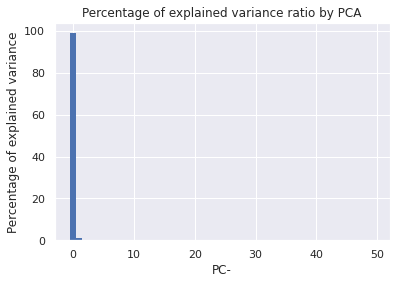

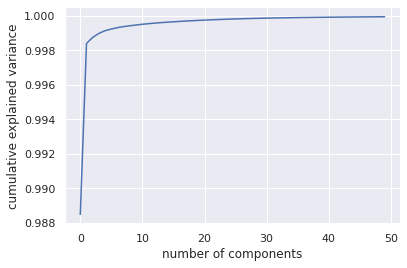

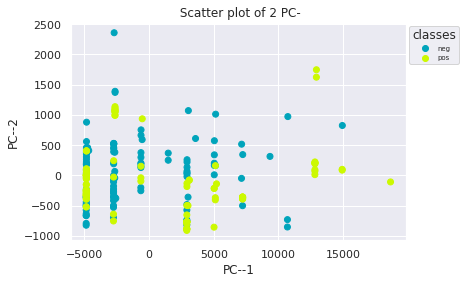

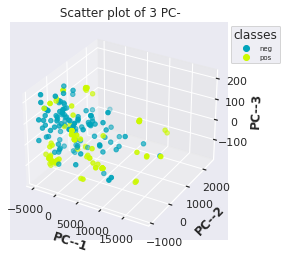

<Figure size 432x288 with 0 Axes>

In [51]:
# GRAPHICS
# bar plot with the contribution of each pca
fd.pca_bar_plot(show=True, path_save=None,
                title='Percentage of explained variance ratio by PCA',
                width=1, data=None, color='b', edgecolor='k', linewidth=0,
                tick_label=None)

#cumulative explain ratio
fd.pca_cumulative_explain_ratio(show=True, path_save=None)

# scatter plot of two principal components relative to labels
fd.pca_scatter_plot(target=labels, pca1=0, pca2=1, title=None, show=True, path_save='pca_scatter_plot.png')
# scatter plot of three principal components relative to labels
fd.pca_scatter_plot3d(target=labels, pca1=0, pca2=1, pca3=2, title=None, show=True,
               path_save='pca_scatter_plot.png')

In [53]:
# OTHER ALGORITHMS 
# batch sparse pca
fd=FeatureDecomposition(fps_x=dataset, report_name=None, classes=labels)
pca, x_pca = fd.run_batch_sparse_pca(n_components=50, alpha=1, batch_size=50)

# truncated svd
fd=FeatureDecomposition(fps_x=dataset, report_name=None, classes=labels)
svd, x_svd = fd.run_truncated_svd(n_components=50, n_iter=5, random_state=42)

Original shape: (222, 1448)
Reduced shape: (222, 50)
Number of components: 50
Finished 'run_batch_sparse_pca' in 11.5770 secs
Original shape: (222, 1448)
Reduced shape: (222, 50)
Variance explained by the PC: 0.9999412015023271
Number of components: [[ 7.13973762e-04  6.29648832e-05  2.11834495e-05 ...  4.21274487e-04
   3.95220081e-04  4.13164298e-04]
 [ 5.05717195e-03  9.64850796e-04  6.90043003e-05 ...  1.59514503e-03
   1.54484439e-03  1.39100012e-03]
 [-4.44273941e-02 -1.03300806e-02  5.41417881e-04 ...  7.30640156e-03
   6.81253014e-03  7.50865435e-03]
 ...
 [-9.51216995e-02 -1.78479712e-02 -2.54956471e-03 ...  4.30132374e-03
  -4.57167695e-03  3.05677215e-02]
 [ 1.12276880e-02 -9.85657967e-03 -1.51270278e-02 ... -2.58638037e-03
  -6.64849741e-03  1.08163210e-02]
 [-1.46455029e-01 -4.19435037e-02  6.04798243e-03 ... -5.30235892e-03
   1.96278823e-03 -6.92415414e-03]]
Finished 'run_truncated_svd' in 0.0308 secs


5. MANIFOLD

Class to do manifold learning. Manifold algorithms is an approach to non-linear dimensionality reduction.
This class performs t-sne and UMAP.
For additional information please read:
    https://umap-learn.readthedocs.io/en/latest/
    https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html
Contrary to methods such as PCA, manifold preserve nonlinear relationships in the data.

The class opens with x_data, a dataset containing the features or encodings. Classes of this representations may
    be given in the classes argument (optional). If wanted, already porjected/ embedding matrices
    may be given just to run plots.
    
    
This class allows to run:
            t-SNE: tool to visualize high-dimensional data. It converts similarities between data points to joint
        probabilities and tries to minimize the Kullback-Leibler divergence between the joint probabilities of the
        low-dimensional embedding and the high-dimensional data. t-SNE has a cost function that is not convex,
        i.e. with different initializations we can get different results.
            UMAP 
            Function to retrieve scatter plot for 2 dimensions for both t-SNE and UMAP analysis.

Finished 'run_tsne' in 3.4722 secs


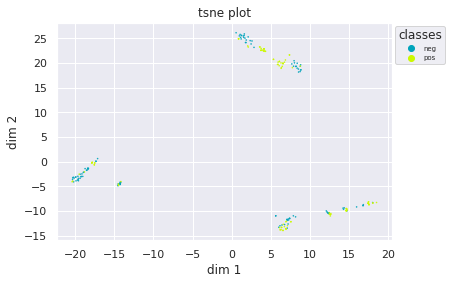

Finished 'run_umap' in 7.5873 secs


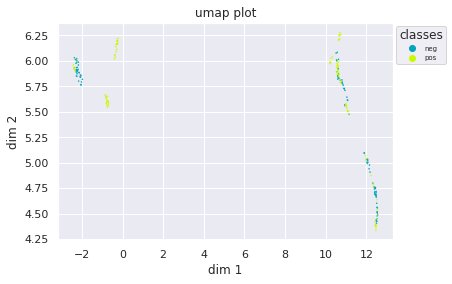

<Figure size 432x288 with 0 Axes>

In [56]:
from propythia.manifold import Manifold

# read and define dataset
dataset = pd.read_csv(r'../tests/datasets/dataset1_test_clean.csv', delimiter=',', encoding='latin-1')
labels = dataset['labels']
dataset = dataset.loc[:, dataset.columns != 'labels']

# run tsne
mf = Manifold(x_data=dataset, classes=labels, X_embedded=None, projected = None) # createobj
tsne = mf.run_tsne(n_components = 2)
mf.manifold_scatter_plot(target = labels, dim1=0, dim2=1, title='tsne plot', show=True, path_save=None)

# run umap
mf = Manifold(x_data=dataset, classes=labels, X_embedded=None, projected = None)
mapper, embedding = mf.run_umap(n_neighbors=20, min_dist=0.1, n_components=50,metric='correlation', target=None)
mf.manifold_scatter_plot(target = labels, dim1=0, dim2=1, title='umap plot', show=True, path_save=None)



6. FEATURE SELECTION 

The FeatureSelection class aims to select features to improve estimators’ accuracy scores or to boost their performance on very high-dimensional datasets.
    
It implements sklearn functions. To use this module, imports from sklearn will mostly likely be necessary. 
Attention that yu should use selection on train datasets. The transformers should then be used in test datasets. 

It is possible to perform: 
   Univariate feature selection tecnhiques: 
            univariate function, the user choose the scoring function, the mode and param value. Univariate feature selector, it             selects works the best features based on univariate statistical tests. It can select the k highest scoring features             or a user specified percentage of features. Scoring functions for classification problems can be chi2, f_classif or             mutual_info_classif; 
     
   Recursive feature elimination (RFE) 
            Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), RFE is to               select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on             the initial set of features and the importance of each feature is obtained either through a coef_ attribute or                   through a feature_importances_ attribute. Then, the least important features are pruned from current set of                     features.That procedure is recursively repeated on the pruned set until the desired number of features to select is             eventually reached;
        
   SelectFromModel: 
            is a meta-transformer that can be used along with any estimator that has a coef_ or feature_importances_ attribute               after fitting. The features are considered unimportant and removed, if the corresponding coef_ or                               feature_importances_ values are below the provided threshold parameter.

In all cases, and for the user to retain power for future operations, the functions retrieve the x dataset fit, the X dataset transformed, the columns selected, the scores of those features. 

This module has a report function. When opening the class, if a report name is provided, a report file will be generated. This file will have all the results of the functions run inside this class.

In [4]:
import pandas as pd
from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesClassifier
from propythia.feature_selection import FeatureSelection

dataset = pd.read_csv(r'../tests/datasets/dataset1_test_clean.csv', delimiter=',', encoding='latin-1')
x_original=dataset.loc[:, dataset.columns != 'labels']
labels=dataset['labels']

# scale data
scaler = StandardScaler()
fps_x = scaler.fit_transform(x_original)

In [70]:
# UNIVARIATE

# **Select KBest** KBest with *mutual info classif*
fs=FeatureSelection(x_original = fps_x, target=labels, columns_names=x_original.columns,
                    dataset=None, report_name=None)
transformer, x_fit_univariate, x_transf_univariate, column_selected, scores, scores_df = \
    fs.run_univariate(score_func=mutual_info_classif, mode='k_best', param=50)

#**Select Percentile with *f classif*
fs=FeatureSelection(x_original = fps_x, target=labels, columns_names=x_original.columns,
                    dataset=None, report_name=None)
transformer, x_fit_univariate, x_transf_univariate, column_selected, scores, scores_df = \
    fs.run_univariate(score_func=f_classif, mode='percentile', param=0.5)


# Select only the features with p value inferior to 0.015
fs=FeatureSelection(x_original = fps_x, target=labels, columns_names=x_original.columns,
                    dataset=None, report_name=None)
transformer, x_fit_univariate, x_transf_univariate, column_selected, scores, scores_df = \
    fs.run_univariate(score_func=f_classif, mode='fpr', param=0.05)


# shape of transformed dataset
print('shape of transformed dataset', x_transf_univariate.shape)
# columns selected by high score
scores = fs.scores_ranking(scores=scores, df_column_name='features ranking', all=False)
print(scores)



original X dataset shape: (222, 1448)
New X dataset shape: (222, 50)
number of column selected: (50,)
scores:                                  scores_ranking
_SolventAccessibilityC1                0.387188
PAAC8                                  0.352343
_HydrophobicityD1001                   0.350443
G                                      0.347939
_HydrophobicityD1050                   0.341527
_ChargeD1025                           0.324160
global                                 0.315384
_ChargeD3100                           0.314570
_PolarityD3025                         0.313594
_HydrophobicityD1075                   0.312594
APAAC8                                 0.311698
_HydrophobicityD1025                   0.300778
_PolarityD3100                         0.296510
moment                                 0.295532
_HydrophobicityT13                     0.293237
_ChargeC2                              0.289209
_PolarityC2                            0.286326
_PolarizabilityC1         

In [3]:
 # Recursive feature elimination
#estimator=SVC kernel=linear with 5 cross validation
fs=FeatureSelection(x_original = fps_x, target=labels, columns_names=x_original.columns,
                    dataset=None, report_name=None)

transformer, x_fit_rfe, x_transf_rfe, column_selected, feat_impo_df =\
    fs.run_recursive_feature_elimination(cv=3, estimator=SVC(kernel="linear"), n_jobs=None,step=1)

# shape of transformed dataset
print(x_transf_rfe.shape)
# columns selected names
print(dataset.columns[column_selected])
# scores
print(feat_impo_df)

original X dataset shape: (222, 1448)
New X dataset shape: (222, 328)
number of column selected: (328,)
features ranking:            features_ranking
AA                        1
QSOSW12                   1
QL                        1
QF                        1
PT                        1
...                     ...
M                         1
LP                        1
LN                        1
LK                        1
taugrant5                 1

[328 rows x 1 columns]
Finished 'run_recursive_feature_elimination' in 299.7169 secs
(222, 328)
Index(['AA', 'AD', 'AN', 'APAAC10', 'APAAC12', 'APAAC14', 'APAAC18', 'APAAC20',
       'APAAC3', 'APAAC8',
       ...
       'autocorr_5', 'autocorr_6', 'bomanindex', 'formulaS', 'global',
       'hydrophobic_ratio', 'taugrant30', 'taugrant38', 'taugrant4',
       'taugrant5'],
      dtype='object', length=328)
           features_ranking
AA                        1
QSOSW12                   1
QL                        1
QF                  

In [78]:
# Select from model

# L1-based feature selection   f linear_model.LogisticRegression/svm.LinearSVC for classification
# With SVMs and logistic-regression, the parameter C controls the sparsity: the smaller C the fewer features selected.
model_lsvc = LinearSVC(C=0.1, penalty="l1", dual=False)
model_lr=LogisticRegression(C=0.1, penalty="l2", dual=False)
model_tree=ExtraTreesClassifier(n_estimators=50)

# model= Tree classifier. 50 estimators
fs=FeatureSelection(x_original = fps_x, target=labels, columns_names=x_original.columns,
                    dataset=None, report_name=None)
select_model, x_transf_model, column_selected, feat_impo, feat_impo_df = \
    fs.run_from_model(model=model_tree)

# model LR
fs=FeatureSelection(x_original = fps_x, target=labels, columns_names=x_original.columns,
                    dataset=None, report_name=None)
select_model, x_transf_model, column_selected, feat_impo, feat_impo_df = \
    fs.run_from_model(model=model_lr)

# model SVC
fs=FeatureSelection(x_original = fps_x, target=labels, columns_names=x_original.columns,
                    dataset=None, report_name=None)
select_model, x_transf_model, column_selected, feat_impo, feat_impo_df = \
    fs.run_from_model(model=model_lsvc)

print(feat_impo_df)

print('original shape', dataset.shape)
print('reduce shape', x_transf_model.shape)

dataset = fs.get_transformed_dataset()


original X dataset shape: (222, 1448)
New X dataset shape: (222, 379)
number of column selected: (379,)
features importance:                           features importance
G                                    0.022112
PAAC8                                0.018600
arc_2                                0.016133
LF                                   0.015412
PAAC12                               0.011498
...                                       ...
L                                    0.000703
GearyAuto_ResidueVol7                0.000702
GV                                   0.000698
GearyAuto_FreeEnergy9                0.000696
MoranAuto_AvFlexibility5             0.000695

[379 rows x 1 columns]
column selected: [   0    1    5   14   15   16   17   18   19   20   23   24   25   27
   28   31   32   41   45   47   48   52   63   83   89   94   95  104
  105  109  110  125  126  130  131  134  135  137  143  144  145  151
  154  156  171  177  182  185  186  189  191  202  203  205  206  20

7. CLUSTERING

This module intend to facilitate clustering analysis. It allows to perform:
                Kmeans clustering
                Mini batch Kmeans clustering 
                hierarchical clustering (metric and method can be choosed) with plot dendogram 
Retrieve seaborn table and cross table with true y if true y is given

This module has a report function. When opening the class, if a report name is provided, a report file will be generated. This file will have all the results of the functions run inside this class.

In [5]:
from propythia.clustering import Cluster
from sklearn.preprocessing import label_binarize

dataset = pd.read_csv(r'../tests/datasets/dataset1_test_clean_fselection.csv', delimiter=',')
# separate labels
x_original=dataset.loc[:, dataset.columns != 'labels']
labels=dataset.loc[:,'labels']
lab = label_binarize(labels, ['neg', 'pos'])
labels =[item for sublist in lab for item in sublist]
# scale data
scaler = StandardScaler()
fps_x = scaler.fit_transform(x_original)


accuracy 0.9594594594594594
col_0       0
col_1       0
col_2       0
col_3       0
col_4       0
col_5       0
col_6       0
col_7       0
col_8       0
col_9       0
col_10      0
col_11      0
col_12      0
col_13      0
col_14      0
col_15      0
col_16      0
col_17      0
col_18      0
col_19      0
col_20      0
col_21      0
col_22      0
col_23      0
col_24      0
col_25      0
col_26      0
col_27      0
col_28      0
col_29      0
col_30      0
col_31      0
col_32      0
col_33      0
col_34      0
col_35      0
col_36      0
col_37      0
col_38      0
col_39      0
col_40      0
col_41      0
col_42      0
col_43      0
col_44      0
col_45      0
col_46      0
col_47      0
col_48      0
col_49      0
col_50      0
col_51      0
col_52      0
col_53      0
col_54      0
col_55      0
col_56      0
col_57      0
col_58      0
col_59      0
col_60      0
col_61      0
col_62      0
col_63      0
col_64      0
col_65      0
col_66      0
col_67      0
col_68      0
col_69

<Figure size 432x288 with 0 Axes>

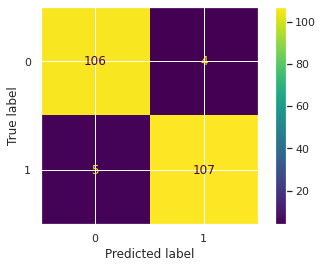

Finished 'run_kmeans' in 0.2591 secs


<Figure size 432x288 with 0 Axes>

In [8]:
# create the cluster object
cl=Cluster(fps_x, target=labels, report_name=None)

# perform K means
clf, y_labels, centroids = cl.run_kmeans(max_iter=300, n_clusters=None, init='k-means++', random_state=None)


accuracy 0.03153153153153153
col_0       0
col_1       0
col_2       0
col_3       0
col_4       0
col_5       0
col_6       0
col_7       0
col_8       0
col_9       0
col_10      0
col_11      0
col_12      0
col_13      0
col_14      0
col_15      0
col_16      0
col_17      0
col_18      0
col_19      0
col_20      0
col_21      0
col_22      0
col_23      0
col_24      0
col_25      0
col_26      0
col_27      0
col_28      0
col_29      0
col_30      0
col_31      0
col_32      0
col_33      0
col_34      0
col_35      0
col_36      0
col_37      0
col_38      0
col_39      0
col_40      0
col_41      0
col_42      0
col_43      0
col_44      0
col_45      0
col_46      0
col_47      0
col_48      0
col_49      0
col_50      0
col_51      0
col_52      0
col_53      0
col_54      0
col_55      0
col_56      0
col_57      0
col_58      0
col_59      0
col_60      0
col_61      0
col_62      0
col_63      0
col_64      0
col_65      0
col_66      0
col_67      0
col_68      0
col_6

<Figure size 432x288 with 0 Axes>

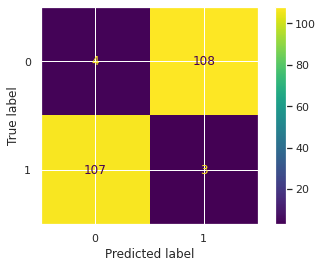

Finished 'run_minibatch_kmeans' in 0.4513 secs


<Figure size 432x288 with 0 Axes>

In [6]:
# create the cluster object
cl=Cluster(fps_x, target=labels, report_name=None)
# minibatch
clf, y_labels, centroids = cl.run_minibatch_kmeans(max_iter=300, batch_size=100, n_clusters=2, init='k-means++')


accuracy 0.04504504504504504
col_0       0
col_1       0
col_2       0
col_3       0
col_4       0
col_5       0
col_6       0
col_7       0
col_8       0
col_9       0
col_10      0
col_11      0
col_12      0
col_13      0
col_14      0
col_15      0
col_16      0
col_17      0
col_18      0
col_19      0
col_20      0
col_21      0
col_22      0
col_23      0
col_24      0
col_25      0
col_26      0
col_27      0
col_28      0
col_29      0
col_30      0
col_31      0
col_32      0
col_33      0
col_34      0
col_35      0
col_36      0
col_37      0
col_38      0
col_39      0
col_40      0
col_41      0
col_42      0
col_43      0
col_44      0
col_45      0
col_46      0
col_47      0
col_48      0
col_49      0
col_50      0
col_51      0
col_52      0
col_53      0
col_54      0
col_55      0
col_56      0
col_57      0
col_58      0
col_59      0
col_60      0
col_61      0
col_62      0
col_63      0
col_64      0
col_65      0
col_66      0
col_67      0
col_68      0
col_6

<Figure size 432x288 with 0 Axes>

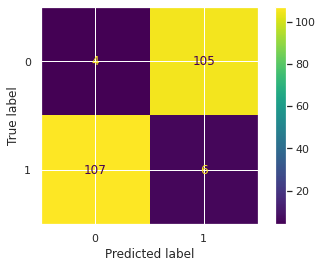

Finished 'run_hierarchical' in 0.2459 secs


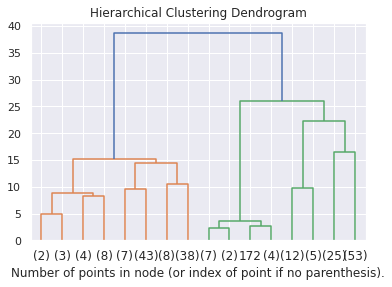

<Figure size 432x288 with 0 Axes>

In [7]:
# create the cluster object
cl=Cluster(fps_x, target=labels, report_name=None)
#run hierarchical 
hmodel, y_labels, n_leaves = cl.run_hierarchical(n_clusters=None, affinity='euclidean', linkage='ward', y_data=None)
#plot hierarchical
cl.plot_dendrogram(model=hmodel, title='Hierarchical Clustering Dendrogram', truncate_mode='level', p=3,
                    path_save=None, show=True)

Text(5, 0, '(8)')
{0: (0.0, 0.6444666666666666, 0.7333666666666667), 1: (0.7999666666666666, 0.9777666666666667, 0.0)}


KeyError: '(8)'

<Figure size 432x288 with 0 Axes>

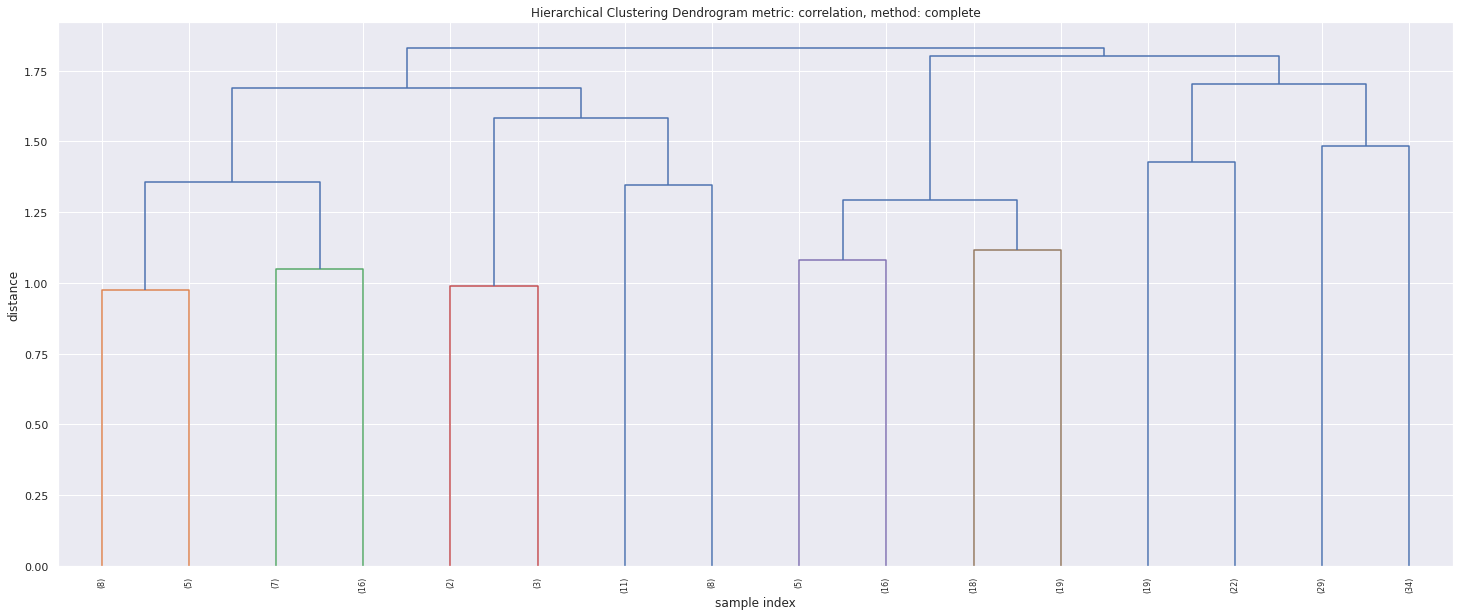

In [9]:
# using scipy based hierarchical clustering
cl.hierarchical_dendogram(metric='correlation', method='complete', path_save=None, show=True,
                           truncate_mode='level', p=3)
# cl.hierarchical_dendogram(metric='correlation', method='average', path_save=None, show=True,
#                              truncate_mode='level', p=3)
# cl.hierarchical_dendogram(metric='euclidean', method='ward', path_save=None, show=True,
#                              truncate_mode='level', p=3)

8. SHALLOW MACHINE LEARNING

Machine Learning module allows to perform machine learning using scikit learn library as base.
Models available: 'svm', 'linear_svm', 'knn', 'sgd', 'lr','rf', 'gnb', 'nn','gboosting'. 

It allows to: 

    Perform grid search or randomized search with a given param grid or a established default one.Uses the Matthews   correlation coefficient but other metric can be used.
    Perform cross validation score on a given model or the previous default accepted. It returns the scores across the different folds, means and standard deviations of these scores.
    Return test score for a model. The calculated metrics include Matthews correlation coefficient, accuracy, precision, recall, f1 and area under the Receiver-Operator Curve (roc_auc), sensitivity and specificity (in bnary) and confusion matrices. See `sklearn.metrics <http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics>` for more information.
    Plot cross-validation curve for the specified classifier on all tested parameters given in the option 'param_range'.
    Plot a learning curve to determine cross validated training and tests scores for different training set sizes. It retrieves graphic representing learning curves, numbers of trainig examples, scores on training sets, and scores on tests set and scalability and performance plots if set to True.
    Plot ROC AUC - On the y axis, true positive rate and false positive rate on the X axis. The top left corner of the plot is the 'ideal' point - a false positive rate of zero, and a true positive rate of one, meaning a larger area under the curve (AUC) is usually better.
    Retrieve feature importance dataframe. 
    Retrieve feature importance plot
    Feature importance is retrieved using the coef_ from models like 'svm', 'sgd', 'lr', 'linear_svm' (can be positive or negative) and feature_importances in 'rf', 'gboosting'(only positive values) 
    
   This module has a report function. When opening the class, if a report name is provided, a report file will be generated. This file will have all the results of the functions run inside this class.

In [2]:

from propythia.shallow_ml import ShallowML
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, matthews_corrcoef
from sklearn.preprocessing import label_binarize, StandardScaler


dataset = pd.read_csv(r'../tests/datasets/dataset1_test_clean_fselection.csv', delimiter=',')

x_original=dataset.loc[:, dataset.columns != 'labels']
labels=dataset['labels']
lab = label_binarize(labels, ['neg', 'pos'])
labels =[item for sublist in lab for item in sublist]
x_train, x_test, y_train, y_test = train_test_split(x_original, labels, train_size=0.2, stratify=labels)

scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
    
    

In [3]:
# create Machine learning object
ml=ShallowML(x_train, x_test, y_train, y_test, report_name=None, columns_names=x_original.columns)

# TRAIN BEST MODEL
best_svm_model = ml.train_best_model(model='svm', scaler=None,
                 score=make_scorer(matthews_corrcoef),
                 cv=3, optType='gridSearch', param_grid=None,
                 n_jobs=10,
                 random_state=1, n_iter=15, refit=True)
print('svm')


# to run ther model just eed to substitute the model . If randomizedSearch is prefered, change in optType. 

# best_linear_model = ml.train_best_model(model='linear_svm', scaler=None,
#                                      score=make_scorer(matthews_corrcoef),
#                                      cv=3, optType='randomizedSearch', param_grid=None,
#                                      n_jobs=10,
#                                      random_state=1, n_iter=15, refit=True)
# best_rf_model = ml.train_best_model(model='rf', scaler=None,
#                                 score=make_scorer(matthews_corrcoef),
#                                 cv=3, optType='gridSearch', param_grid=None,
#                                 n_jobs=10,
#                                 random_state=1, n_iter=15, refit=True)
# best_sgd_model = ml.train_best_model(model='sgd', scaler=None,
#                                      score=make_scorer(matthews_corrcoef),
#                                      cv=3, optType='gridSearch', param_grid=None,
#                                      n_jobs=10,
#                                      random_state=1, n_iter=15, refit=True)

performing gridSearch...
GridSearchCV took 1.03 seconds for 16 candidate parameter settings.
GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scl', None),
                                       ('clf', SVC(random_state=1))]),
             n_jobs=10,
             param_grid=[{'clf__C': [0.01, 0.1, 1.0, 10],
                          'clf__kernel': ['linear']},
                         {'clf__C': [0.01, 0.1, 1.0, 10],
                          'clf__gamma': ['scale', 0.001, 0.0001],
                          'clf__kernel': ['rbf']}],
             scoring=make_scorer(matthews_corrcoef))
Model with rank: 1
 Mean validation score: 1.000 (std: 0.000)
 Parameters: {'clf__C': 0.01, 'clf__kernel': 'linear'}
 

Model with rank: 1
 Mean validation score: 1.000 (std: 0.000)
 Parameters: {'clf__C': 10, 'clf__gamma': 0.001, 'clf__kernel': 'rbf'}
 

Model with rank: 3
 Mean validation score: 0.958 (std: 0.059)
 Parameters: {'clf__C': 1.0, 'clf__gamma': 'scale', 'clf__kernel': 'rbf'}
 

Mod

In [11]:
# CROSS VAL SCORE
scores = ml.cross_val_score_model(model_name='knn',
                      score='accuracy',
                      cv=10,
                      n_jobs=10,
                      random_state=1)
scores

performing cross val score with 10 folds


,fit_time,score_time,test_score
0,0.000453,0.001140,0.80
1,0.000311,0.000815,1.00
2,0.000324,0.000784,1.00
3,0.000299,0.000693,1.00
4,0.000297,0.000658,1.00
5,0.000302,0.000643,1.00
6,0.000319,0.000741,1.00
7,0.000297,0.000752,1.00
8,0.000313,0.000710,1.00
9,0.000288,0.000673,1.00


In [21]:
ml=ShallowML(x_train, x_test, y_train, y_test, report_name=None, columns_names=x_original.columns)
# train best model
best_svm_model = ml.train_best_model(model='svm', scaler=None,
                                     score=make_scorer(matthews_corrcoef),
                                     cv=3, optType='gridSearch', param_grid=None,
                                     n_jobs=10,
                                     random_state=1, n_iter=15, refit=True, probability=True)
# evaluate on test set
scores, report, cm, cm2 = ml.score_testset()
scores

performing gridSearch...
GridSearchCV took 0.94 seconds for 16 candidate parameter settings.
GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scl', None),
                                       ('clf',
                                        SVC(probability=True,
                                            random_state=1))]),
             n_jobs=10,
             param_grid=[{'clf__C': [0.01, 0.1, 1.0, 10],
                          'clf__kernel': ['linear']},
                         {'clf__C': [0.01, 0.1, 1.0, 10],
                          'clf__gamma': ['scale', 0.001, 0.0001],
                          'clf__kernel': ['rbf']}],
             scoring=make_scorer(matthews_corrcoef))
Model with rank: 1
 Mean validation score: 1.000 (std: 0.000)
 Parameters: {'clf__C': 0.01, 'clf__kernel': 'linear'}
 

Model with rank: 1
 Mean validation score: 1.000 (std: 0.000)
 Parameters: {'clf__C': 10, 'clf__gamma': 0.001, 'clf__kernel': 'rbf'}
 

Model with rank: 3
 Mean validation scor

{'Accuracy': 0.9662921348314607,
 'MCC': 0.9328198302298666,
 'log_loss': 0.11070614653415817,
 'f1 score': 0.9666666666666667,
 'roc_auc': 0.9662921348314606,
 'Precision': array([0.5       , 0.95604396, 1.        ]),
 'Recall': array([1.        , 0.97752809, 0.        ]),
 'fdr': 0.04395604395604396,
 'sn': 0.9775280898876404,
 'sp': 0.9550561797752809}

In [14]:
ml.plot_roc_curve(ylim=(0.0, 1.00), xlim=(0.0, 1.0),
               title='Receiver operating characteristic (ROC) curve',
               path_save=None, show=True)

Finished 'plot_roc_curve' in 0.0000 secs


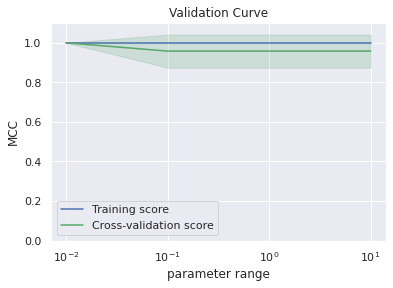

Finished 'plot_validation_curve' in 0.5703 secs


<Figure size 432x288 with 0 Axes>

In [15]:
ml.plot_validation_curve(param_name='clf__C', param_range=[0.01, 0.1, 1.0, 10],
                          cv=5,
                          score=make_scorer(matthews_corrcoef), title="Validation Curve",
                          xlab="parameter range", ylab="MCC", n_jobs=1, show=True,
                          path_save=None)

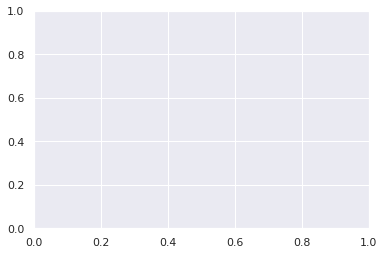

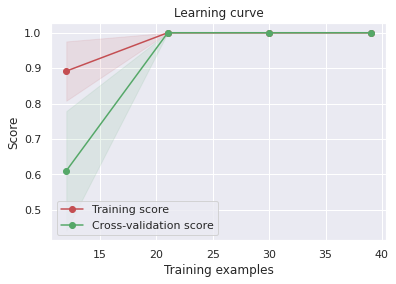

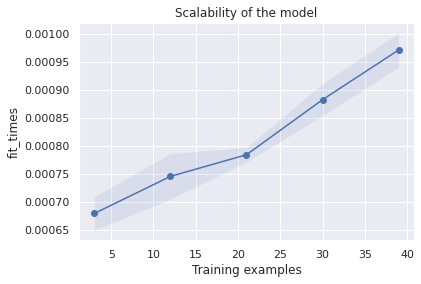

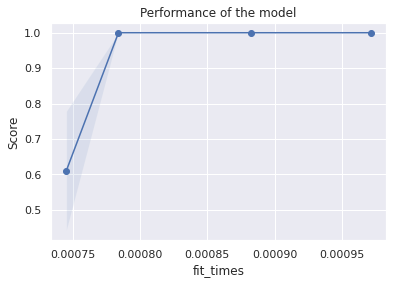

Finished 'plot_learning_curve' in 0.5951 secs


<Figure size 432x288 with 0 Axes>

In [20]:
 ml.plot_learning_curve(title='Learning curve', ylim=None,
                            cv=10,
                            n_jobs=1, 
                            path_save=None, show=True, scalability=True, performance=True)

In [17]:
#make predictions
predict_df = ml.predict(x=x_test, seqs=None, classifier=best_svm_model, names=None, true_y=y_test)
predict_df

Finished 'predict' in 0.0066 secs


,class predicted,True classes,prob_class_0,prob_class_1
0,1,1,0.0067,0.9933
1,0,0,0.9057,0.0943
2,0,0,0.9843,0.0157
3,1,1,0.0055,0.9945
4,0,0,0.5776,0.4224
...,...,...,...,...
173,1,1,0.0280,0.9720
174,0,0,0.8433,0.1567
175,0,0,0.6038,0.3962
176,1,1,0.0270,0.9730


                                   0  mean_coef
PAAC8                       0.210575   0.210575
_SolventAccessibilityC1     0.173793   0.173793
_PolarizabilityC2          -0.173499   0.173499
CG                          0.129364   0.129364
_SolventAccessibilityT12   -0.120528   0.120528
F                           0.120389   0.120389
QSOSW25                    -0.115929   0.115929
PAAC14                      0.112648   0.112648
MoranAuto_ResidueASA4       0.097610   0.097610
_HydrophobicityD1025        0.080226   0.080226
GearyAuto_Hydrophobicity6  -0.080061   0.080061
GearyAuto_Hydrophobicity16  0.063511   0.063511
EN                          0.062121   0.062121
MoranAuto_Mutability1       0.062100   0.062100
_PolarizabilityD1100        0.057516   0.057516
PAAC12                     -0.040523   0.040523


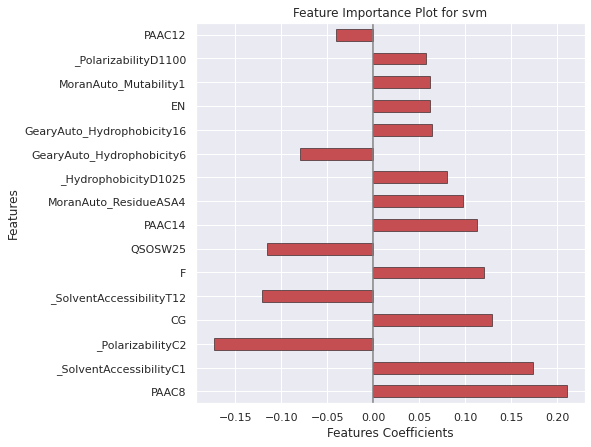

<Figure size 432x288 with 0 Axes>

In [22]:
# Retrieve feature importances
df = ml.features_importances_df(top_features=20, column_to_sort='mean_coef')
print(df)
ml.features_importances_plot(column_to_plot=0, show=True, path_save='feat_impo.png',
                          title=None,
                          kind='barh', figsize=(9, 7), color='r', edgecolor='black')


performing gridSearch...
GridSearchCV took 0.72 seconds for 6 candidate parameter settings.
GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scl', None),
                                       ('clf',
                                        RandomForestClassifier(random_state=1))]),
             n_jobs=10,
             param_grid=[{'clf__bootstrap': [True], 'clf__criterion': ['gini'],
                          'clf__max_features': ['sqrt', 'log2'],
                          'clf__n_estimators': [10, 100, 500]}],
             scoring=make_scorer(matthews_corrcoef))
Model with rank: 1
 Mean validation score: 1.000 (std: 0.000)
 Parameters: {'clf__bootstrap': True, 'clf__criterion': 'gini', 'clf__max_features': 'sqrt', 'clf__n_estimators': 100}
 

Model with rank: 1
 Mean validation score: 1.000 (std: 0.000)
 Parameters: {'clf__bootstrap': True, 'clf__criterion': 'gini', 'clf__max_features': 'sqrt', 'clf__n_estimators': 500}
 

Model with rank: 1
 Mean validation score: 1.000 (

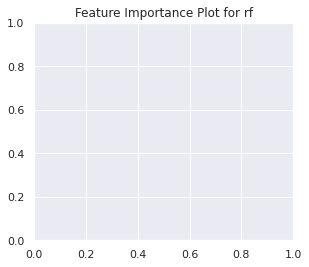

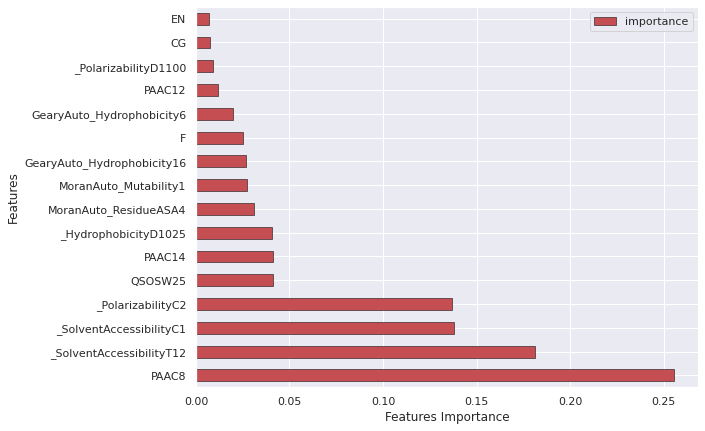

<Figure size 432x288 with 0 Axes>

In [25]:
# retrieve feature importance for RF 
best_rf_model = ml.train_best_model(model='rf', scaler=None,
                                    score=make_scorer(matthews_corrcoef),
                                    cv=3, optType='gridSearch', param_grid=None,
                                    n_jobs=10,
                                    random_state=1, n_iter=15, refit=True)
df = ml.features_importances_df(top_features=20, column_to_sort='mean_coef')
print(df)
ml.features_importances_plot(show=True, path_save='feat_impo.png',
                             title=None,
                             kind='barh', figsize=(9, 7), color='r', edgecolor='black')


 In this section we will use an enzyme dataset (the same used in examplpes), a multiclass problem that intends to classify enzymes in 7 different classes plus non enzyme sequences. 
 
The y dataset was mantained as categorical ( 0 1 2 3 4 5 6 7 ), important for the choice of functions. 
 
First we will prepare the x dataset (in three ways, categorical encoding of aa, hot encoding 1D and hot encoding 2D).

Next we will do the classification problem using a user defined model, next, using pre defined propythia models. 

In [2]:
import os
import pandas as pd
import tensorflow as tf
import numpy as np
os.environ["CUDA_VISIBLE_DEVICES"] = '6,7'
gpus = tf.config.experimental.list_physical_devices('GPU')
tf.debugging.set_log_device_placement(True)
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
            # tf.config.experimental.set_visible_devices(gpus[:1], 'GPU')

        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

from collections import Counter
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical, np_utils
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Input, Embedding, Dense, Dropout, LSTM, Flatten
from tensorflow.keras.layers import MaxPool1D, MaxPool2D, Conv1D, Conv2D
from tensorflow.keras.models import Sequential, load_model, Model
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

from sklearn.metrics import make_scorer, matthews_corrcoef
from sklearn.preprocessing import label_binarize, StandardScaler
from sklearn.model_selection import train_test_split

from propythia.deep_ml import DeepML


# PAD ZEROS 200 20 aa  X = 0 categorcial encoding
def pad_sequence(df, seq_len=700, padding='pre'):
    sequences_original = df['sequence'].tolist()
    sequences=[]
    for seq in sequences_original:
        seq1 = seq.replace('B', 'N')  # asparagine N / aspartic acid  D - asx - B
        seq2 = seq1.replace('Z', 'Q')  # glutamine Q / glutamic acid  E - glx - Z
        seq3 = seq2.replace('U',
                            'C')  # selenocisteina, the closest is the cisteine. but it is a different aminoacid . take care.
        seq4 = seq3.replace('O', 'K')  # Pyrrolysine to lysine
        sequences.append(seq4)

    alphabet = "XARNDCEQGHILKMFPSTWYV"
    char_to_int = dict((c, i) for i, c in enumerate(alphabet))
    int_to_char = dict((i, c) for i, c in enumerate(alphabet))
    # {'X': 0,
    #  'A': 1,
    #  'R': 2,
    #  'N': 3,
    #  'D': 4,...
    sequences_integer_ecoded = []
    for seq in sequences:
        # seq = seq.replace('X', 0)  # unknown character eliminated
        # define a mapping of chars to integers
        # integer encode input data
        integer_encoded = [char_to_int[char] for char in seq]
        sequences_integer_ecoded.append(integer_encoded)
    fps_x = pad_sequences(sequences_integer_ecoded, maxlen=seq_len, padding=padding, value=0.0)   # (4042, 200)
    return fps_x


# split dataset
hot_90 = pd.read_csv(r'../tests/datasets/ecpred_uniprot_uniref_90.csv', delimiter=',')
# FPS Yget the first level of enzymes. in multilabel only consider identical labels
l = []
for ec_list in hot_90['ec_number']:
    ec_1 = [x.strip()[0] for x in ec_list.split(';') ]
    l.append(list(set(ec_1)))
hot_90['ec_number1']=l
l = []
for ec_list in hot_90['ec_number1']:
    ec_l = set(ec_list)
    l.append(ec_l)
hot_90['ec_single_label']=l
data = hot_90.loc[hot_90['ec_single_label'].apply(len)<2,:]
data=data.dropna(subset=['sequence'])
data = data[data['sequence'].str.contains('!!!') == False]
counts = Counter(x for xs in data['ec_single_label'] for x in set(xs))
counts.most_common()
df = pd.DataFrame.from_dict(counts, orient='index').reset_index()
df_sorted = df.sort_values(by=[0], ascending=False)

# index      0
# 0     2  54343
# 3     3  34484
# 4     0  22708
# 2     1  19066
# 7     6  16290
# 1     4  12924
# 5     5   8081
# 6     7   6860
fps_y = data['ec_single_label']
fps_y = [item for sublist in fps_y for item in sublist] # this line is because they are retrieved as a list
encoder = LabelEncoder()
encoder.fit(fps_y)
fps_y_encoded = encoder.transform(fps_y)
classes = encoder.classes_
fps_y_bin = np_utils.to_categorical(fps_y_encoded)

# FPS_X get sequence hot encoded
seq_len = 500
fps_x_categ = pad_sequence(data, seq_len=seq_len, padding='pre')
fps_x_hot2d = to_categorical(fps_x_categ)
fps_x_hot1d = fps_x_hot2d.reshape(fps_x_hot2d.shape[0], fps_x_hot2d.shape[1]*fps_x_hot2d.shape[2])


2 Physical GPUs, 2 Logical GPUs


Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Add in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Add in device /job:localhost/replica:0/task:0/device:GPU:

Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
185/185 [==============================] - 29s 158ms/step - loss: 1.7210 - accuracy: 0.3547 - val_loss: 1.7132 - val_accuracy: 0.3644 - lr: 0.0010
Epoch 3/30
185/185 [==============================] - ETA: 0s - loss: 1.6275 - accuracy: 0.3948Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapD

Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
185/185 [==============================] - 29s 157ms/step - loss: 0.7190 - accuracy: 0.7537 - val_loss: 0.8191 - val_accuracy: 0.7199 - lr: 0.0010
Epoch 18/30
185/185 [==============================] - ETA: 0s - loss: 0.6968 - accuracy: 0.7621Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMap

Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
185/185 [==============================] - 30s 160ms/step - loss: 0.5860 - accuracy: 0.7998 - val_loss: 0.7292 - val_accuracy: 0.7541 - lr: 0.0010
Epoch 26/30
185/185 [==============================] - ETA: 0s - loss: 0.5783 - accuracy: 0.8027Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Tensor

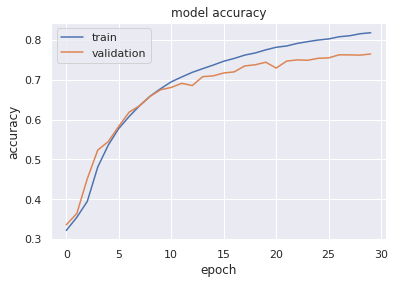

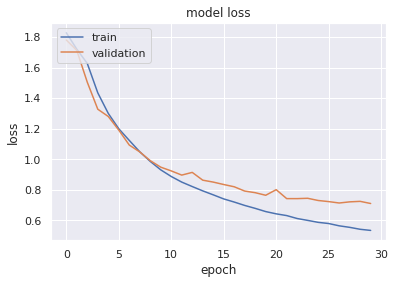

<Figure size 432x288 with 0 Axes>

In [3]:
# RUN WITH A USER DEFINED MODEL 

# define model
def veltri_model(seq_len,final_units=8, output_dim = 128):
    model = Sequential()
    model.add(Input(shape=(seq_len,)))
    model.add(Embedding(input_dim=21, output_dim=output_dim, input_length=seq_len, mask_zero=True))
    model.add(Conv1D(
        filters=64,
        kernel_size=16,
        strides=1,
        padding='same',
        activation='relu'))
    model.add(MaxPool1D(pool_size=5, strides=1, padding='same'))
    # model.add(Dense(256))
    model.add(LSTM(units=100,
                   dropout=0.1,
                   unroll=True,
                   return_sequences=False,
                   stateful=False))

    # Add Classification Dense, Compile model and make it ready for optimization
    model.add(Dense(final_units, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# the model needs to be a Kerasclassifier one
model = KerasClassifier(build_fn=veltri_model, seq_len=seq_len)


# Define train, test and validation datasets
# this model needs as input the categorical fps_x
fps_x = fps_x_categ

# divide dataset in train test validation
x_train_1, x_test, y_train_1, y_test = train_test_split(fps_x, fps_y_encoded, test_size=0.20, random_state=42,
                                                       stratify=fps_y_encoded, shuffle=True)
x_train, x_dval, y_train, y_dval = train_test_split(x_train_1, y_train_1, test_size=0.25, random_state=42,
                                                    stratify=y_train_1, shuffle=True)

vector_size = x_train.shape[1]
final_units = fps_y_bin.shape[1]


# create DL object. caution that is necessary to give the number of classesa and if it is a multiclass or binary 
dl = DeepML(x_train, y_train, x_test, y_test,
                number_classes=final_units, problem_type='multiclass',
                x_dval=x_dval, y_dval=y_dval,
                model=None,
                epochs=30, batch_size=512, callbacks=None,
                reduce_lr=True, early_stopping=True, checkpoint=True, tensorboard=False,
                early_stopping_patience=30, reduce_lr_patience=50, reduce_lr_factor=0.2, reduce_lr_min=0.00001,
                path='', report_name=None, verbose=1,  validation_split=0.1, shuffle=True, class_weights=None)


# run model
dm = dl.run_model(model)


In [5]:
# evaluate the model

score_simple = dl.model_simple_evaluate()
scores, report, cm, cm2 = dl.model_complete_evaluate()
print('score simple \n', score_simple) #loss and accuracy
print('confusion matrix \n', cm) # if you want class vs class choose cm2
scores

Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
1093/1093 [==============================] - 37s 34ms/step - loss: 0.7340 - accuracy: 0.7554
('test loss, test acc:', [0.7340381145477295, 0.7553501725196838])
Executing op RangeDa

{'Accuracy': 0.7553501945525292,
 'MCC': 0.6985270320854675,
 'log_loss': 0.7340381256811719,
 'f1 score weighted': 0.754345585918778,
 'f1 score macro': 0.7588592665817573,
 'f1 score micro': 0.7553501945525292,
 'roc_auc ovr': 0.9461361146240171,
 'roc_auc ovo': 0.9515774469032435,
 'precision': 0.7580692612596824,
 'recall': 0.7553501945525292}

Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Average precision score, micro-averaged over all classes: 0.84


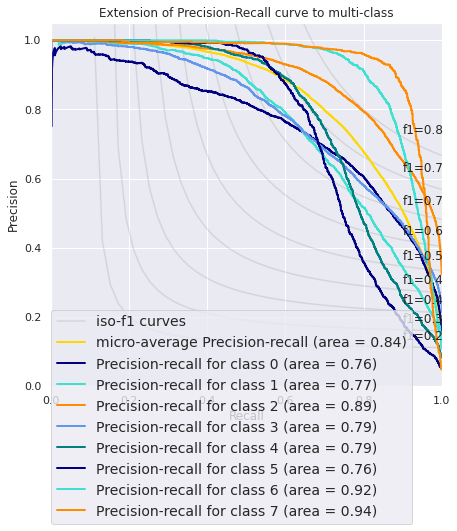

Finished 'precision_recall_curve' in 30.6228 secs


<Figure size 432x288 with 0 Axes>

In [7]:
# # evaluation curves
#precision recall curve 
dl.precision_recall_curve(show=True, path_save=None)   

Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHand

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_2193779 in device /job:localhost/replica:0/task:0/device:GPU:0
3277/3277 [==============================] - 323s 99ms/step - loss: 0.6183 - accuracy: 0.6898
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/devi

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_2524319 in device /job:localhost/replica:0/task:0/device:GPU:0
3277/3277 [==============================] - 325s 99ms/step - loss: 0.1888 - accuracy: 0.9536
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU

Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_predict_function_2789807 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:

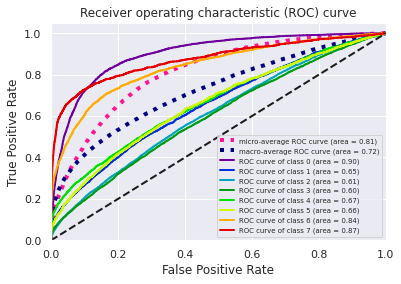

Finished 'roc_curve' in 3802.3111 secs


<Figure size 432x288 with 0 Axes>

In [8]:
#ROC curve  ROC Curves (trade-off between the true positive rate and false positive rate for a predictive
#         model using different probability thresholds.
#         ROC curves are appropriate when the observations are balanced between each class.
#         :param classifier: classifier instance. If None, will ret
dl.roc_curve(ylim=(0.0, 1.00), xlim=(0.0, 1.0),
      title='Receiver operating characteristic (ROC) curve',
      path_save=None, show=True, batch_size=None)

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHand

Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_predict_function_393486 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_624774 in device /job:localhost/replica:0/task:0/device:GPU:0
2622/2622 [==============================] - 240s 92ms/step - loss: 1.7321 - accuracy: 0.3555
Exec

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:

Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHan

Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_predict_function_1263796 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/d

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1495084 in device /job:localhost/replica:0/task:0/device:GPU:0
2622/2622 [==============================] - 271s 103ms/step - loss: 1.7359 - accuracy: 0.3546
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/dev

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:

Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in devic

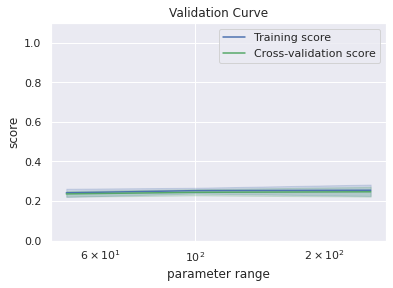

Finished 'plot_validation_curve' in 7267.1017 secs


<Figure size 432x288 with 0 Axes>

In [6]:
#validation curve
dl.plot_validation_curve(param_name='output_dim', param_range=[50, 100, 256], cv=5,
                      score=make_scorer(matthews_corrcoef), title="Validation Curve",
                      xlab="parameter range", ylab="score", n_jobs=1, show=True,
                      path_save=None)




Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHand

Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2249299 in device /job:localhost/replica:0/task:0/device:GPU:0
1093/1093 [==============================] - 35s 32ms/step - loss: 1.8520 - accuracy: 0.3131
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_2479468 in device /job:localhost/replica:0/task:0/device:GPU:0
1693/1693 [==============================] - 183s 108ms/step - loss: 1.7904 - accuracy: 0.3325
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0


Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job

Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
710/710 [==============================] - 23s 32ms/step - loss: 1.8038 - accuracy: 0.3273
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Execut

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:

Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleO

Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_3723825 in device /job:localhost/replica:0/task:0/device:GPU:0
1093/1093 [==============================] - 35s 32ms/step - loss: 1.6268 - accuracy: 0.3978
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:

<Figure size 432x288 with 0 Axes>

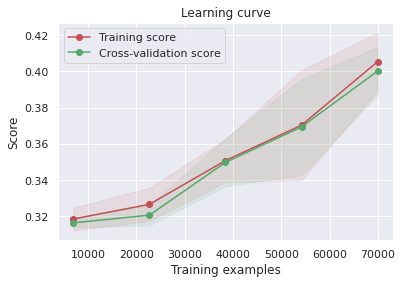

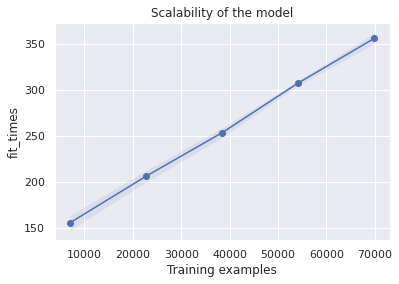

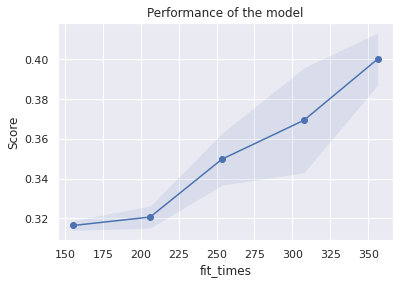

Finished 'plot_learning_curve' in 5081.0876 secs


<Figure size 432x288 with 0 Axes>

In [7]:
# learning curve
dl.plot_learning_curve(title='Learning curve', ylim=None, cv=3,
                n_jobs=1, path_save=None, show=True, scalability=True, performance=True)

In [4]:
# predict  (use the test daatset just to demonstrate how to perform. in real work sshould have a separate dataset)
predict_df = dl.predict(x = x_test, seqs=None, classifier=None, names=None, true_y=y_test, batch = None)
predict_df

Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_predict_function_143731 in device /job:localhost/replica:0/task:0/d

,class predicted,True classes,prob_class_1,prob_class_2,prob_class_3,prob_class_4,prob_class_5,prob_class_6,prob_class_7,prob_class_8
0,2,2,0.0653,0.0751,0.7364,0.0712,0.0116,0.0034,0.0366,0.0004
1,6,6,0.0001,0.0000,0.0001,0.0007,0.0002,0.0000,0.9988,0.0000
2,3,1,0.0043,0.0938,0.1089,0.7280,0.0350,0.0151,0.0138,0.0011
3,1,0,0.0074,0.8268,0.0541,0.0589,0.0500,0.0021,0.0003,0.0003
4,4,4,0.0000,0.0000,0.0003,0.0001,0.9994,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...
34947,6,6,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000
34948,2,2,0.0920,0.0165,0.8490,0.0297,0.0041,0.0020,0.0060,0.0008
34949,2,2,0.0017,0.0031,0.9816,0.0067,0.0013,0.0048,0.0005,0.0003
34950,0,0,0.9751,0.0075,0.0141,0.0024,0.0007,0.0000,0.0000,0.0001


In [5]:
# save and reconstructed model saved
dl.save_model(path='model.h5') # model.save(path)
reconstructed_model=dl.load_model(path='model.h5')

# get the model stored in class
model = dl.get_model()

model saved at model.h5
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0


In [6]:
# train a model CV
scores_cv = dl.train_model_cv(model=model, x_cv=x_train_1, y_cv=y_train_1, cv=5)


Fold  0
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 1/30
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0


197/197 [==============================] - ETA: 0s - loss: 1.2793 - accuracy: 0.5434Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
197/197 [==============================] - 31s 158ms/step - loss: 1.2793 - accuracy: 0.5434 - va

Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
197/197 [==============================] - 32s 162ms/step - loss: 0.8851 - accuracy: 0.6946 - val_loss: 0.9113 - val_accuracy: 0.6841 - lr: 0.0010
Epoch 14/30
197/197 [==============================] - ETA: 0s - loss: 0.8516 - accuracy: 0.7072Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMap

Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
197/197 [==============================] - 31s 157ms/step - loss: 0.6897 - accuracy: 0.7637 - val_loss: 0.7713 - val_accuracy: 0.7343 - lr: 0.0010
Epoch 22/30
197/197 [==============================] - ETA: 0s - loss: 0.6741 - accuracy: 0.7698Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Tensor

Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
197/197 [==============================] - 32s 162ms/step - loss: 0.5774 - accuracy: 0.8018 - val_loss: 0.7188 - val_accuracy: 0.7629 - lr: 0.0010
Epoch 30/30
197/197 [==============================] - ETA: 0s - loss: 0.5690 - accuracy: 0.8050Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Map

Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
197/197 [==============================] - 31s 157ms/step - loss: 1.6863 - accuracy: 0.3695 - val_loss: 1.5817 - val_accuracy: 0.4256 - lr: 0.0010
Epoch 3/30
197/197 [==============================] - ETA: 0s - loss: 1.5218 - accuracy: 0.4430Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatD

Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
197/197 [==============================] - 31s 158ms/step - loss: 0.9838 - accuracy: 0.6597 - val_loss: 0.9851 - val_accuracy: 0.6564 - lr: 0.0010
Epoch 11/30
197/197 [==============================] - ETA: 0s - loss: 0.9475 - accuracy: 0.6711Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Prefetch

Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
197/197 [==============================] - 32s 162ms/step - loss: 0.7724 - accuracy: 0.7333 - val_loss: 0.8305 - val_accuracy: 0.7151 - lr: 0.0010
Epoch 19/30
197/197 [==============================] - ETA: 0s - loss: 0.7625 - accuracy: 0.7381Executing op Range

Epoch 26/30
197/197 [==============================] - ETA: 0s - loss: 0.6542 - accuracy: 0.7755Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
197/197 [==============================] - 32s 163ms/step - loss: 0.6542 - accuracy:

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:

Epoch 7/30
197/197 [==============================] - ETA: 0s - loss: 1.0979 - accuracy: 0.6189Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
197/197 [==============================] - 33s 169ms/step - loss: 1.0979 - accuracy: 

Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
197/197 [==============================] - 33s 167ms/step - loss: 0.7826 - accuracy: 0.7312 - val_loss: 0.8133 - val_accuracy: 0.7179 - lr: 0.0010
Epoch 15/30
197/197 [==============================] - ETA: 0s - loss: 0.7586 - accuracy: 0.7399Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMap

Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
197/197 [==============================] - 32s 162ms/step - loss: 0.6359 - accuracy: 0.7829 - val_loss: 0.7289 - val_accuracy: 0.7501 - lr: 0.0010
Epoch 23/30
197/197 [==============================] - ETA: 0s - loss: 0.6173 - accuracy: 0.7895Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Tensor

Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
197/197 [==============================] - 34s 174ms/step - loss: 0.5368 - accuracy: 0.8177 - val_loss: 0.6865 - val_accuracy: 0.7728 - lr: 0.0010
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in d

Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
197/197 [==============================] - 33s 166ms/step - loss: 1.5468 - accuracy: 0.4314 - val_loss: 1.4125 - val_accuracy: 0.4899 - lr: 0.0010
Epoch 4/30
197/197 [==============================] - ETA: 0s - loss: 1.3682 - accuracy: 0.5078Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipD

Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
197/197 [==============================] - 33s 168ms/step - loss: 0.8697 - accuracy: 0.6984 - val_loss: 0.9138 - val_accuracy: 0.6766 - lr: 0.0010
Epoch 12/30
197/197 [==============================] - ETA: 0s - loss: 0.8393 - accuracy: 0.7104Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMap

Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
197/197 [==============================] - 35s 178ms/step - loss: 0.6808 - accuracy: 0.7679 - val_loss: 0.7847 - val_accuracy: 0.7380 - lr: 0.0010
Epoch 20/30
197/197 [==============================] - ETA: 0s - loss: 0.6694 - accuracy: 0.7724Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Repeat

Epoch 27/30
197/197 [==============================] - ETA: 0s - loss: 0.5752 - accuracy: 0.8041Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
197/197 [==============================] - 33s 168ms/step - loss: 0.5752 - accuracy:

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_843071 in device /job:localhost/replica:0/task:0/device:GPU:0
197/197 [==============================] - ETA: 0s - loss: 1.8408 - accuracy: 0.3147Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executin

Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
197/197 [==============================] - 33s 167ms/step - loss: 0.7387 - accuracy: 0.7451 - val_loss: 0.7902 - val_accuracy: 0.7255 - lr: 0.0010
Epoch 16/30
197/197 [==============================] - ETA: 0s - loss: 0.7129 - accuracy: 0.7549Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMap

Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
197/197 [==============================] - 33s 169ms/step - loss: 0.5955 - accuracy: 0.7961 - val_loss: 0.6998 - val_accuracy: 0.7604 - lr: 0.0010
Epoch 24/30
197/197 [==============================] - ETA: 0s - loss: 0.5826 - accuracy: 0.8015Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Tensor

Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_predict_function_882539 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device

In [7]:
scores_cv

,Accuracy,MCC,log_loss,f1 score weighted,f1 score macro,f1 score micro,roc_auc ovr,roc_auc ovo,precision,recall
0,0.759272,0.703401,0.731893,0.758713,0.767156,0.759272,0.945293,0.952064,0.762179,0.759272
1,0.753907,0.697645,0.744508,0.752994,0.761678,0.753907,0.942701,0.950798,0.754495,0.753907
2,0.770251,0.718597,0.701487,0.771053,0.775827,0.770251,0.950785,0.956573,0.773849,0.770251
3,0.761239,0.706344,0.717081,0.759797,0.769400,0.761239,0.947824,0.953913,0.765811,0.761239
4,0.771781,0.720334,0.697881,0.769539,0.781570,0.771781,0.952059,0.958353,0.776586,0.771781
mean,0.763290,0.709264,0.718570,0.762419,0.771126,0.763290,0.947732,0.954340,0.766584,0.763290
std,0.006767,0.008804,0.017733,0.006851,0.006916,0.006767,0.003444,0.002793,0.007987,0.006767


Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHand

Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in d

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_1960639 in device /job:localhost/replica:0/task:0/device:GPU:0
2331/2331 [==============================] - 257s 110ms/step - loss: 1.7156 - accuracy: 0.3608
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CP

Executing op __inference_train_function_2192863 in device /job:localhost/replica:0/task:0/device:GPU:0
197/197 [==============================] - ETA: 0s - loss: 1.8650 - accuracy: 0.3082Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device

Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
197/197 [==============================] - 43s 220ms/step - loss: 1.0755 - accuracy: 0.6184 - val_loss: 1.0414 - val_accuracy: 0.6286 - lr: 0.0010
Epoch 9/30
197/197 [==============================] - ETA: 0s - loss: 1.0055 - accuracy: 0.6454Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorD

Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
197/197 [==============================] - 34s 174ms/step - loss: 0.7499 - accuracy: 0.7427 - val_loss: 0.8013 - val_accuracy: 0.7285 - lr: 0.0010
Epoch 17/30
197/197 [==============================] - ETA: 0s - loss: 0.7266 - accuracy: 0.7511Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Map

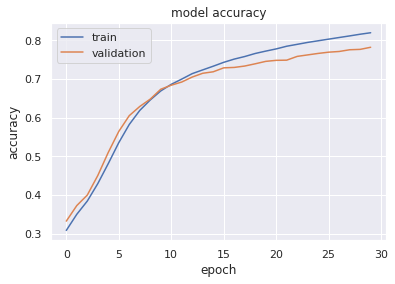

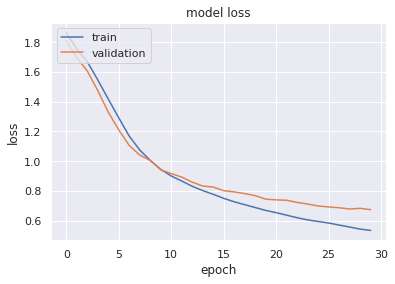

['Model with rank: 1\n', 'Mean validation score: 0.242 (std: 0.012)\n', "Parameters: {'output_dim': 128}\n", '\n']
['Model with rank: 2\n', 'Mean validation score: 0.240 (std: 0.030)\n', "Parameters: {'output_dim': 256}\n", '\n']
['Model with rank: 3\n', 'Mean validation score: 0.200 (std: 0.041)\n', "Parameters: {'output_dim': 64}\n", '\n']
Best score (scorer: make_scorer(matthews_corrcoef)) and parameters from a 3-fold cross validation:

df
      means      stds  output_dim
1  0.241554  0.011920         128
2  0.239734  0.030004         256
0  0.200319  0.041062          64


<Figure size 432x288 with 0 Axes>

In [8]:
# do hyperparameter optimization . dataXand dataY None, it will use the x_train and y_train
param_grid = {'output_dim':[64, 128, 256]}
best_model = dl.get_opt_params(param_grid,  model=model, optType='gridSearch', cv=3, dataX=None, datay=None,
               n_iter_search=15, n_jobs=1, scoring=make_scorer(matthews_corrcoef))


# Base models
With the same case study applying models predefined in ProPytia.
 **BASE MODELS** can be run, cross validate or hyperparameter optimized in automatic way.
 To run put cv and optType = None
 To run cross validate scores put cv = number fo folds (eg 3) and optType = None
 To run hyperparameter optimization put cv = number f folds and optType = 'randomizedSearch' or 'gridSearch' 
            simple dense - Stack of dense layers
            embedding dense - Embedding layer + Stack of dense layers
            lstm simple - Stack of lstm/bidirectional layers + stack of dense layers
            lstm embedding - Embedding layer + Stack of lstm/bidirectional layers + stack of dense layers
            CNN 1D - Stack of CNN1D (with max pooling)  + Stack of dense layers
            CNN 2D - Stack of CNN2D (with max pooling)  + Stack of dense layers
            hybrid model - Stack of CNN1D (with max pooling) + Stack of lstm/bidirectional layers + Stack of dense layers

Parameters of these models include:
            layers - receive tuples with the layers and units to consider. For example (128,64) will run a network with 2 hidden layers with 128, followed by one with 64. Networks with more than one type of layers, will have the name layers specified. 
            dropout_rate: tuple. dropout rate to be used after each layer of model. If dropout rate is only one number,
        it will be propagated to the dense layers existent. For example (0.3,) will introduces 0.3 dropout rate after
         the first and after the second dense layer. (0.3,0.2) will introduce 0.3 after the first layer and 0.2 after the second one. Be aware that if it is only one value in tuple it will replicate in  layers. If it is not one number it needs to have the same amount of dropouts as number of layers.  Dropouts of 0.0 can be indicated. 
            batchnormalization: tuple. whether to use or not batch normalizzation after each dense layer. If
        is only one value it will be propagated to the dense layers existent. FOr example (True,) will introduces
        bactchNorm after the first and after the second dense layer.
        embedding parameters, CNN or LSTM specific parameters
        l1 regularization value
        l2 regularization value
        initial_dropout_value - whether to introduce an initial dropout rate before first layer. 0.0 by default.
        loss and activation function - if set to None, it will be set automatically
        cv - number of folds if cross validate or hyperparameter optimization
        hyperOpt - type of hyperparaemter search. randomizedSearch or gridSearch
        n_iter - number of searches to perform if randomizedSearch is applied 
        scoring function
        optimizer
        
        
run_dnn_simple() 
run_dnn_embedding()
run_lstm_simple()
run_lstm_embedding()
run_cnn_lstm()
run_cnn_1D()
run_cnn_2D()


In [3]:
# simple dense - Stack of dense layers

fps_x = fps_x_hot1d # the input to the dense layers is the 1  hot encoded vector
input_dim = fps_x_hot1d.shape[1]
final_units = fps_y_bin.shape[1]
#train test validation split 
x_train_1, x_test, y_train_1, y_test = train_test_split(fps_x, fps_y_encoded, test_size=0.20, random_state=42,
                                                        stratify=fps_y_encoded, shuffle=True)
x_train, x_dval, y_train, y_dval = train_test_split(x_train_1, y_train_1, test_size=0.25, random_state=42,
                                                    stratify=y_train_1, shuffle=True)

dnn model simple
[0.3, 0.3]
Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Add in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device 

Executing op RealDiv in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
185/185 [==============================] - 3s 18ms/step - accuracy: 0.3667 - loss: 2.0544 - val_accuracy: 0.4759 - val_loss: 1.6970 - lr: 0.0010
Epoch 2/30
184/185 [============================>.] - ETA: 0s - accuracy: 0.5723 - loss: 1.4713Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /

Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RebatchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AutoShardDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptimizeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op GeneratorDataset in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op GeneratorDataset in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:GPU:0
185/185 [==============================] - 2s 11ms/step - accuracy: 0.7837 - loss: 0.9673 - val_accuracy: 0.6070 - val_loss: 1.6126 - lr: 0.0010
Epoch 7/30
183/185 [============================>.] - ETA: 0s - accuracy: 0.8022 - loss: 0.9372Executing 

Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RebatchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AutoShardDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptimizeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op GeneratorDataset in device /job:localhost/replica:0/task:0/device:GPU:0
Execut

Epoch 16/30
178/185 [===========================>..] - ETA: 0s - accuracy: 0.8855 - loss: 0.7996Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RebatchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Exe

Executing op GeneratorDataset in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op GeneratorDataset in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:GPU:0
185/185 [==============================] - 2s 11ms/step - accuracy: 0.8982 - loss: 0.7853 - val_accuracy: 0.6301 - val_loss: 1.9930 - lr: 0.0010
Epoch 21/30
181/185 [============================>.] - ETA: 0s - accuracy: 0.9023 - loss: 0.7798Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op R

Executing op RebatchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AutoShardDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptimizeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op GeneratorDataset in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op GeneratorDataset in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:GPU:0
185/185 [==============================] - 2s 11ms/step - accuracy: 0.9081 - loss: 0.7804 - val_accuracy: 0.6286 - val_loss: 2.0502 - lr: 0.0010
Epoch 26/30
185/185 [==============================] - ETA: 0s - accuracy: 0.9097 - loss: 0.7765Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executi

Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RebatchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AutoShardDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptimizeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op GeneratorDataset in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op GeneratorDataset in device /job:localhost/replica:0/task:0/device:GPU:0
Exec

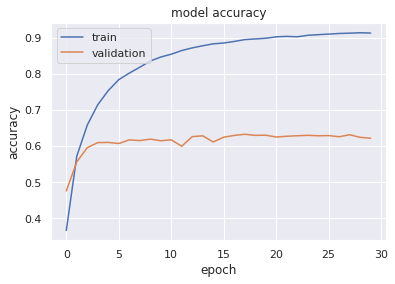

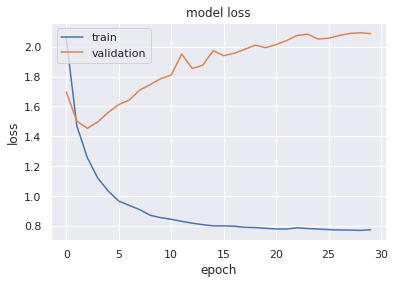

<Figure size 432x288 with 0 Axes>

In [3]:
#open class
dl = DeepML(x_train, y_train, x_test, y_test,
            number_classes=final_units, problem_type='multiclass',
            x_dval=x_dval, y_dval=y_dval,
            model=None,
            epochs=30, batch_size=512, callbacks=None,
            reduce_lr=True, early_stopping=True, checkpoint=True, tensorboard=False,
            early_stopping_patience=30, reduce_lr_patience=50, reduce_lr_factor=0.2, reduce_lr_min=0.00001,
            path='', report_name=None, verbose=1,  validation_split=0.1, shuffle=True, class_weights=None)

# run simple dnn  cv = None optType=None
dnn_simple = dl.run_dnn_simple(
               input_dim=input_dim,
               optimizer='Adam',
               hidden_layers=(128, 64),
               dropout_rate=(0.3,),
               batchnormalization=(True,),
               l1=1e-5, l2=1e-4,
               final_dropout_value=0.3,
               initial_dropout_value=0.0,
               loss_fun=None, activation_fun=None,
               cv=None, optType=None, param_grid=None, n_iter_search=15, n_jobs=1,
               scoring=make_scorer(matthews_corrcoef))



In [4]:
# run cross validated DNN 
# dnn simple cv cv=something optType =None
#open class
dl = DeepML(x_train, y_train, x_test, y_test,
            number_classes=final_units, problem_type='multiclass',
            x_dval=x_dval, y_dval=y_dval,
            model=None,
            epochs=30, batch_size=128, callbacks=None,
            reduce_lr=True, early_stopping=True, checkpoint=True, tensorboard=False,
            early_stopping_patience=30, reduce_lr_patience=50, reduce_lr_factor=0.2, reduce_lr_min=0.00001,
            path='', report_name=None, verbose=1,  validation_split=0.1, shuffle=True, class_weights=None)

scores_dnn_simple_cv = dl.run_dnn_simple(
    input_dim=input_dim,
    optimizer='Adam',
    hidden_layers=(128, 64),
    dropout_rate=(0.3,),
    batchnormalization=(True,),
    l1=1e-5, l2=1e-4,
    final_dropout_value=0.3,
    initial_dropout_value=0.0,
    loss_fun=None, activation_fun=None,
    cv=3, optType=None, param_grid=None, n_iter_search=15, n_jobs=1,
    scoring=make_scorer(matthews_corrcoef))


dnn model simple

Fold  0
[0.3, 0.3]
Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Add in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:1
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:1
Executing op VarIsI

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:1
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:1
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:1
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:1
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:1
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:1
Executing op VarHandleOp in device /job:

Executing op GeneratorDataset in device /job:localhost/replica:0/task:0/device:GPU:1
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:GPU:1
492/492 [==============================] - 4s 7ms/step - accuracy: 0.6335 - loss: 1.3832 - val_accuracy: 0.5536 - val_loss: 1.6424 - lr: 0.0010
Epoch 4/30
490/492 [============================>.] - ETA: 0s - accuracy: 0.6782 - loss: 1.3056Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDat

Epoch 8/30
485/492 [============================>.] - ETA: 0s - accuracy: 0.7771 - loss: 1.1966Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RebatchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Exec

Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RebatchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AutoShardDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptimizeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executi

Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RebatchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AutoShardDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptimizeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op GeneratorDataset in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op GeneratorDataset in device /job:localhost/replica:0/task:0/device:GPU:1
Executing op GeneratorDataset in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:GPU:0

Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AutoShardDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptimizeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op GeneratorDataset in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op GeneratorDataset in device /job:localhost/replica:0/task:0/device:GPU:1
Executing op GeneratorDataset in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op GeneratorDataset in device /job:localhost/replica:0/task:0/device:GPU:1
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:GPU:1
492/492 [==============================] - 3s 7ms/step - accuracy: 0.8650 - loss: 1.0932 - val_accuracy: 0.5742 - val_loss: 2.3895 - lr: 0.0010
Epoch 21/30
49

Executing op GeneratorDataset in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op GeneratorDataset in device /job:localhost/replica:0/task:0/device:GPU:1
Executing op GeneratorDataset in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op GeneratorDataset in device /job:localhost/replica:0/task:0/device:GPU:1
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:GPU:1
492/492 [==============================] - 3s 7ms/step - accuracy: 0.8717 - loss: 1.0824 - val_accuracy: 0.5666 - val_loss: 2.3848 - lr: 0.0010
Epoch 25/30
484/492 [============================>.] - ETA: 0s - accuracy: 0.8701 - loss: 1.0850Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing 

Executing op GeneratorDataset in device /job:localhost/replica:0/task:0/device:GPU:1
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:GPU:1
492/492 [==============================] - 3s 7ms/step - accuracy: 0.8801 - loss: 1.0511 - val_accuracy: 0.5783 - val_loss: 2.3952 - lr: 0.0010
Epoch 29/30
491/492 [============================>.] - ETA: 0s - accuracy: 0.8783 - loss: 1.0613Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDa

274/274 [==============================] - 1s 2ms/step

Fold  1
[0.3, 0.3]
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RebatchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDat

Epoch 2/30
492/492 [==============================] - ETA: 0s - accuracy: 0.5541 - loss: 1.5502Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RebatchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Exec

Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RebatchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AutoShardDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptimizeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executi

Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RebatchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AutoShardDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptimizeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op GeneratorDataset in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op GeneratorDataset in device /job:localhost/replica:0/task:0/device:GPU:1
Executing op GeneratorDataset in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:GPU:0

Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AutoShardDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptimizeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op GeneratorDataset in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op GeneratorDataset in device /job:localhost/replica:0/task:0/device:GPU:1
Executing op GeneratorDataset in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op GeneratorDataset in device /job:localhost/replica:0/task:0/device:GPU:1
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:GPU:1
492/492 [==============================] - 3s 7ms/step - accuracy: 0.8361 - loss: 1.1184 - val_accuracy: 0.5747 - val_loss: 2.1755 - lr: 0.0010
Epoch 15/30
48

Executing op GeneratorDataset in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op GeneratorDataset in device /job:localhost/replica:0/task:0/device:GPU:1
Executing op GeneratorDataset in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op GeneratorDataset in device /job:localhost/replica:0/task:0/device:GPU:1
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:GPU:1
492/492 [==============================] - 3s 7ms/step - accuracy: 0.8570 - loss: 1.0891 - val_accuracy: 0.5817 - val_loss: 2.2661 - lr: 0.0010
Epoch 19/30
484/492 [============================>.] - ETA: 0s - accuracy: 0.8600 - loss: 1.0833Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing 

Executing op GeneratorDataset in device /job:localhost/replica:0/task:0/device:GPU:1
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:GPU:1
492/492 [==============================] - 3s 7ms/step - accuracy: 0.8639 - loss: 1.0771 - val_accuracy: 0.5790 - val_loss: 2.3078 - lr: 0.0010
Epoch 23/30
492/492 [==============================] - ETA: 0s - accuracy: 0.8634 - loss: 1.0780Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDa

Epoch 27/30
487/492 [============================>.] - ETA: 0s - accuracy: 0.8735 - loss: 1.0613Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RebatchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Exe

Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RebatchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AutoShardDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptimizeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op GeneratorDataset in device /job:localhost/replica:0/task:0/device:GPU:0
Execut

ResourceExhaustedError: OOM when allocating tensor with shape[62911,10500] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc [Op:GatherV2]

dnn model simple
[0.3, 0.3]
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0


Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:

Executing op AutoShardDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptimizeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op GeneratorDataset in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op GeneratorDataset in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_25975 in device /job:localhost/replica:0/task:0/device:GPU:0
69/69 [==============================] - 0s 6ms/step
[0.5, 0.5, 0.5]
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:

Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_34586 in device /job:localhost/replica:0/task:0/device:GPU:0
137/137 [==============================] - 1s 9ms/step - accuracy: 0.2048 - loss: 2.9903
Executing 

Executing op OptimizeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op GeneratorDataset in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op GeneratorDataset in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_38131 in device /job:localhost/replica:0/task:0/device:GPU:0
69/69 [==============================] - 0s 6ms/step
[0.3, 0.3, 0.3]
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0


Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_46064 in device /job:localhost/replica:0/task:0/device:GPU:0
137/137 [==============================] - 1s 8ms/step - accuracy: 0.3545 - loss: 3.4057
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/devi

Executing op RebatchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AutoShardDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptimizeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op GeneratorDataset in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op GeneratorDataset in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing

Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RebatchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AutoShardDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptimizeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op GeneratorDataset in device /job:localhost/replica:0/task:0/device:GPU:0
Execut

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_

69/69 [==============================] - 0s 6ms/step
[0.1, 0.1]
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RebatchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in dev

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_

69/69 [==============================] - 0s 6ms/step
[0.25, 0.25]
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RebatchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in d

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_

69/69 [==============================] - 0s 6ms/step
[0.5, 0.5]
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RebatchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in dev

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_

69/69 [==============================] - 0s 6ms/step
[0.1, 0.1]
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RebatchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in dev

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_

Executing op AutoShardDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptimizeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op GeneratorDataset in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op GeneratorDataset in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_87988 in device /job:localhost/replica:0/task:0/device:GPU:0
69/69 [==============================] - 0s 6ms/step
[0.3, 0.3, 0.3]
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:

Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_95805 in device /job:localhost/replica:0/task:0/device:GPU:0
137/137 [==============================] - 1s 8ms/step - accuracy: 0.3042 - loss: 3.6753
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:

Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RebatchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AutoShardDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptimizeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op GeneratorDataset in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op GeneratorDataset in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing 

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_102948 in device /job:localhost/replica:0/task:0/device:GPU:0
137/137 [==============================] - 1s 8ms/step - accuracy: 0.3196 - loss: 2.0169
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU

Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RebatchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AutoShardDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptimizeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op GeneratorDataset in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op GeneratorDataset in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing 

Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RebatchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AutoShardDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptimizeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executi

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:

Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RebatchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AutoShardDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptimizeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op GeneratorDataset in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op GeneratorDataset in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:GPU:0
Ex

Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RebatchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AutoShardDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptimizeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op GeneratorDataset in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op GeneratorDataset in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_118678 in device /job:localhost/replica:0/task:0/device:GPU:0
69/69 [==============================] - 0s 5ms/step
[0.1, 

Executing op OptimizeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op GeneratorDataset in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op GeneratorDataset in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandl

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:

Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RebatchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Au

Executing op RebatchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AutoShardDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptimizeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op GeneratorDataset in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op GeneratorDataset in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:GPU:0
185/185 [==============================] - 2s 11ms/step - accuracy: 0.7811 - loss: 0.9306 - val_accuracy: 0.6144 - val_loss: 1.4760 - lr: 0.0010
Epoch 4/30
184/185 [============================>.] - ETA: 0s - accuracy: 0.8397 - loss: 0.7834Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executin

Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RebatchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AutoShardDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptimizeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op GeneratorDataset in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op GeneratorDataset in device /job:localhost/replica:0/task:0/device:GPU:0
Exec

Executing op GeneratorDataset in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op GeneratorDataset in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:GPU:0
185/185 [==============================] - 2s 11ms/step - accuracy: 0.9477 - loss: 0.6321 - val_accuracy: 0.6174 - val_loss: 2.4250 - lr: 0.0010
Epoch 18/30
183/185 [============================>.] - ETA: 0s - accuracy: 0.9515 - loss: 0.6266Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op R

Executing op RebatchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AutoShardDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptimizeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op GeneratorDataset in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op GeneratorDataset in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:GPU:0
185/185 [==============================] - 2s 11ms/step - accuracy: 0.9537 - loss: 0.6319 - val_accuracy: 0.6251 - val_loss: 2.5334 - lr: 0.0010
Epoch 23/30
180/185 [============================>.] - ETA: 0s - accuracy: 0.9565 - loss: 0.6241Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executi

Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RebatchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AutoShardDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptimizeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op GeneratorDataset in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op GeneratorDataset in device /job:localhost/replica:0/task:0/device:GPU:0
Exec

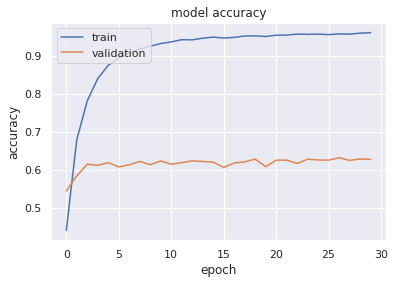

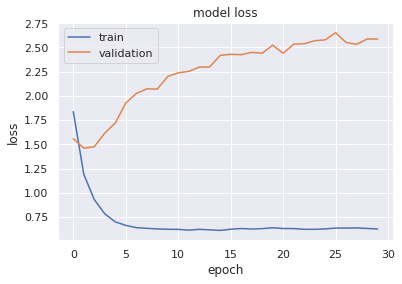

[['Model with rank: 1\n', 'Mean validation score: 0.351 (std: 0.004)\n', "Parameters: {'l2': 0.0001, 'l1': 1e-05, 'hidden_layers': (128, 64), 'dropout_rate': (0.1,)}\n", '\n'], ['Model with rank: 2\n', 'Mean validation score: 0.333 (std: 0.014)\n', "Parameters: {'l2': 0, 'l1': 0.0001, 'hidden_layers': (128, 64), 'dropout_rate': (0.25,)}\n", '\n'], ['Model with rank: 3\n', 'Mean validation score: 0.315 (std: 0.010)\n', "Parameters: {'l2': 0.0001, 'l1': 0, 'hidden_layers': (128, 64), 'dropout_rate': (0.3,)}\n", '\n']]
Best score (scorer: make_scorer(matthews_corrcoef)) and parameters from a 3-fold cross validation:

df
       means      stds       l2       l1  hidden_layers dropout_rate
5   0.350848  0.004163  0.00010  0.00001      (128, 64)       (0.1,)
3   0.332971  0.014331  0.00000  0.00010      (128, 64)      (0.25,)
11  0.314657  0.009731  0.00010  0.00000      (128, 64)       (0.3,)
14  0.297537  0.009743  0.00010  0.00001  (128, 64, 32)       (0.1,)
0   0.262872  0.008200  0.0010

<Figure size 432x288 with 0 Axes>

In [4]:
# rum hyperparameter opimization 
# dnn hyperopt cv and opttype filled. if randomizedSearch, number of iter search is 15 by default but can be changed
# the grid search can be set or be the one established by default.
#open class
dl = DeepML(x_train, y_train, x_test, y_test,
            number_classes=final_units, problem_type='multiclass',
            x_dval=x_dval, y_dval=y_dval,
            model=None,
            epochs=30, batch_size=512, callbacks=None,
            reduce_lr=True, early_stopping=True, checkpoint=True, tensorboard=False,
            early_stopping_patience=30, reduce_lr_patience=50, reduce_lr_factor=0.2, reduce_lr_min=0.00001,
            path='', report_name=None, verbose=1,  validation_split=0.1, shuffle=True, class_weights=None)
dnn_simple_ho = dl.run_dnn_simple(
    input_dim=input_dim,
    optimizer='Adam',
    hidden_layers=(256, 64),
    dropout_rate=(0.3,),
    batchnormalization=(True,),
    l1=1e-5, l2=1e-4,
    initial_dropout_value=0.0,
    loss_fun=None, activation_fun=None,
    cv=3, optType='randomizedSearch', param_grid=None, n_iter_search=15, n_jobs=1,
    scoring=make_scorer(matthews_corrcoef))



dnn model embedding
Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Add in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:1
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:1
Executing op VarIsInitializedOp in d

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:1
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:1
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:1
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:1
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:1
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:1
Executing op VarHandleOp in device /job:

Executing op OptimizeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op GeneratorDataset in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op GeneratorDataset in device /job:localhost/replica:0/task:0/device:GPU:1
Executing op GeneratorDataset in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op GeneratorDataset in device /job:localhost/replica:0/task:0/device:GPU:1
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:GPU:1
185/185 [==============================] - 18s 96ms/step - accuracy: 0.6094 - loss: 2.1618 - val_accuracy: 0.5734 - val_loss: 2.3817 - lr: 0.0010
Epoch 4/30
184/185 [============================>.] - ETA: 0s - accuracy: 0.6390 - loss: 2.1859Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Execu

Executing op GeneratorDataset in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op GeneratorDataset in device /job:localhost/replica:0/task:0/device:GPU:1
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:GPU:1
185/185 [==============================] - 18s 96ms/step - accuracy: 0.7060 - loss: 2.1409 - val_accuracy: 0.6257 - val_loss: 2.4203 - lr: 0.0010
Epoch 8/30
184/185 [============================>.] - ETA: 0s - accuracy: 0.7241 - loss: 2.0794Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op

185/185 [==============================] - 18s 96ms/step - accuracy: 0.7853 - loss: 1.8126 - val_accuracy: 0.6358 - val_loss: 2.3373 - lr: 0.0010
Epoch 12/30
184/185 [============================>.] - ETA: 0s - accuracy: 0.8024 - loss: 1.7159Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDat

Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RebatchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AutoShardDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing o

Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RebatchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AutoShardDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptimizeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op GeneratorDataset in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op GeneratorDataset in device /job:localhost/replica:0/task:0/device:GPU:1
Exec

Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RebatchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AutoShardDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptimizeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op GeneratorDataset in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op GeneratorDataset in device /job:localhost/replica:0/task:0/device:GPU:1
Executing op GeneratorDataset in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op GeneratorDataset in device /job:localhost/replica:0/task:0/device:GPU:1
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:GP

Executing op OptimizeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op GeneratorDataset in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op GeneratorDataset in device /job:localhost/replica:0/task:0/device:GPU:1
Executing op GeneratorDataset in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op GeneratorDataset in device /job:localhost/replica:0/task:0/device:GPU:1
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:GPU:1
185/185 [==============================] - 18s 96ms/step - accuracy: 0.9124 - loss: 1.1236 - val_accuracy: 0.6508 - val_loss: 2.2633 - lr: 0.0010
Epoch 29/30
184/185 [============================>.] - ETA: 0s - accuracy: 0.9158 - loss: 1.0899Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Exec

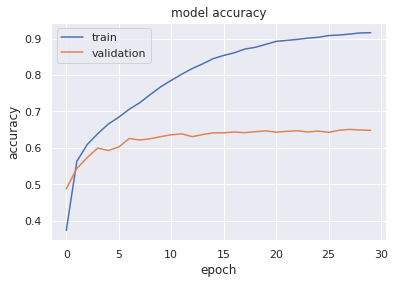

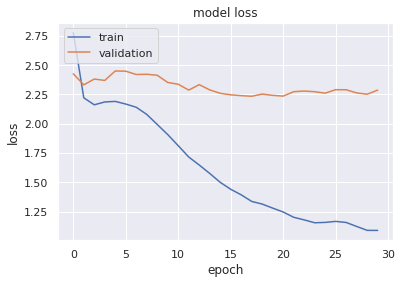

<Figure size 432x288 with 0 Axes>

In [3]:
# same thing but dnn embedding.
# The input for the embedding is the categorical codification of aa 
fps_x = fps_x_categ

# divide dataset in train test validation
x_train_1, x_test, y_train_1, y_test = train_test_split(fps_x, fps_y_encoded, test_size=0.20, random_state=42,
                                                        stratify=fps_y_encoded, shuffle=True)
x_train, x_dval, y_train, y_dval = train_test_split(x_train_1, y_train_1, test_size=0.25, random_state=42,
                                                    stratify=y_train_1, shuffle=True)


input_dim = fps_x.shape[1]
final_units = fps_y_bin.shape[1]

dl = DeepML(x_train, y_train, x_test, y_test,
            number_classes=final_units, problem_type='multiclass',
            x_dval=x_dval, y_dval=y_dval,
            model=None,
            epochs=30, batch_size=512, callbacks=None,
            reduce_lr=True, early_stopping=True, checkpoint=True, tensorboard=False,
            early_stopping_patience=30, reduce_lr_patience=50, reduce_lr_factor=0.2, reduce_lr_min=0.00001,
            path='', report_name=None, verbose=1,  validation_split=0.1, shuffle=True, class_weights=None)

# run simple dnn embedding. Cross validated and Hyperopt are run the same as DNN simple
dnn_emb = dl.run_dnn_embedding(input_dim,
                  optimizer='Adam',
                  input_dim_emb=21, output_dim=256, input_length=seq_len, mask_zero=True,
                  hidden_layers=(128, 64),
                  dropout_rate=(0.3,),
                  batchnormalization=(True,),
                  l1=1e-5, l2=1e-4,
                  loss_fun = None, activation_fun = None,
                  cv=None, optType=None, param_grid=None, n_iter_search=15, n_jobs=1,
                  scoring=make_scorer(matthews_corrcoef))


the other models are run in the same way
just be aware that they require different input shape. 
So : 

lstm_simple - run_lstm_simple()
LSTM needs the inputs to have 3D shape (samples, time steps, features) 
(x.reshape(x.shape[0], 1, x.shape[1]))

lstm_embedding - run_lstm_embedding()
inputs equal to dnn embedding

cnn1D . run_cnn_1D()
the shape for ConV1D should be (samples, n_timesteps,n_features)

hybrid model . run_cnn_lstm()
The first layer is a conv1D, so shape should be (samples, n_timesteps,n_features)

cnn2D - run_cnn_2D()
input shape should be batch size + (image * image, channels)
image is matrix 2D hot encoded (seqlen*number of aa)
x_train, x_test, x_dval = \
    map(lambda x: x.reshape(x.shape[0], x.shape[1], x.shape[2],1), [x_train, x_test, x_dval])
input_dim = (seq_len,number_aa,1)